In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
red_wine = pd.read_csv("..\\datasets\\winequality-red.csv",sep=";")  #file contained more extra characters ( quotation marks, needed to use sep to idicate taht columns are separeted by semicolons)
red_wine.head()
red_wine.tail()
red_wine.shape
red_wine.head()
red_wine.columns

red_wine[red_wine.duplicated(keep="first")]
len(red_wine)


1599

In [10]:
red_wine["quality_label"] = red_wine["quality"].apply(
    lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high'
)

# Convert the 'quality_label' column to a categorical type with an ordered range
red_wine["quality_label"] = pd.Categorical(
    red_wine["quality_label"],
    categories=["low", "medium", "high"],
    ordered=True
)
red_wine.head()
red_wine.columns = red_wine.columns.str.replace(" ","_")
#columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       #'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       #'pH', 'sulphates', 'alcohol', 'quality']
nan_count = red_wine.isna().sum()
nan_count



fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

In [11]:
white_wine = pd.read_csv("winequality-white.csv",sep=";")
white_wine.columns

white_wine["quality_label"] = white_wine["quality"].apply(
    lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high'
)

white_wine["quality_label"] = pd.Categorical(
    white_wine["quality_label"],
    categories=["low", "medium", "high"],
    ordered = True
)
white_wine.columns = white_wine.columns.str.replace(" ","_")
nan_count = white_wine.isna().sum()
nan_count
white_wine.head()
nan_count

white_wine[white_wine.duplicated(keep="first")]


FileNotFoundError: [Errno 2] No such file or directory: 'winequality-white.csv'

### Add a column "wine_type"

In [ ]:
white_wine["wine_type"] = "white"
red_wine["wine_type"] = "red"

all_wines = pd.concat([red_wine,white_wine], axis= 0)

all_wines["wine_type"] = pd.Categorical(
    all_wines["wine_type"],
    categories=["white", "red"],
    ordered = True
)

all_wines


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_label wine_type  
0         9.4        5           low       red  
1         9.8        5           low       red  
2         9.8        5           low       red  
3         9.8        6        medium       red  
4         9.4        5           low       red  
...       ...      ...           ...       ...  
4893     11.2        6        medium     white  
4894      9.6        5           low     white  
4895      9.4        6        medium     white  
4896     12.8        7        medium     white  
4897     11.8        6        medium     white  

[6497 rows x 14 columns]

In [ ]:
red_wine['alcohol_g_per_L'] = red_wine['alcohol'] * 10 * 0.789

# Calculate the acidity-to-alcohol ratio
red_wine['acidity_to_alcohol_ratio'] = red_wine['fixed_acidity'] / red_wine['alcohol_g_per_L']

white_wine['alcohol_g_per_L'] = white_wine['alcohol'] * 10 * 0.789

# Calculate the acidity-to-alcohol ratio
white_wine['acidity_to_alcohol_ratio'] = white_wine['fixed_acidity'] / white_wine['alcohol_g_per_L']

all_wines = pd.concat([red_wine,white_wine], axis= 0)


all_wines



fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_label wine_type  SO2_ratio  alc_acid_ratio  \
0         9.4        5           low       red  32.352941      127.027027   
1         9.8        5           low       red  37.313433      125.641026   
2         9.8        5           low       red  27.777778      125.641026   
3         9.8        6        medium       red  28.333333       87.500000   
4         9.4        5           low       red  32.352941      127.027027   
...       ...      ...           ...       ...        ...             ...   
4893     11.2        6        medium     white  26.086957      180.645161   
4894      9.6        5           low     white  33.928571      145.454545   
4895      9.4        6        medium     white  27.027027      144.615385   
4896     12.8        7        medium     white  18.181818      232.727273   
4897     11.8        6        medium     white  22.448980      196.666667   

      alcohol_g_per_L  acidity_to_alcohol_ratio  
0              74.166                  0.099776  
1              77.322                  0.100877  
2              77.322                  0.100877  
3              77.322                  0.144849  
4              74.166                  0.099776  
...               ...                       ...  
4893           88.368                  0.070161  
4894           75.744                  0.087136  
4895           74.166                  0.087641  
4896          100.992                  0.054460  
4897           93.102                  0.064445  

[6497 rows x 18 columns]

### Compare descriptive statistics between red and white wines:

In [ ]:
rnw = pd.concat([red_wine.describe(), white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])
pd.set_option("display.max_columns", None)  # Show all columns
rnw

Red Wines Stats                                               \
        fixed_acidity volatile_acidity  citric_acid residual_sugar   
count     1599.000000      1599.000000  1599.000000    1599.000000   
mean         8.319637         0.527821     0.270976       2.538806   
std          1.741096         0.179060     0.194801       1.409928   
min          4.600000         0.120000     0.000000       0.900000   
25%          7.100000         0.390000     0.090000       1.900000   
50%          7.900000         0.520000     0.260000       2.200000   
75%          9.200000         0.640000     0.420000       2.600000   
max         15.900000         1.580000     1.000000      15.500000   

                                                                          \
         chlorides free_sulfur_dioxide total_sulfur_dioxide      density   
count  1599.000000         1599.000000          1599.000000  1599.000000   
mean      0.087467           15.874922            46.467792     0.996747   
std       0.047065           10.460157            32.895324     0.001887   
min       0.012000            1.000000             6.000000     0.990070   
25%       0.070000            7.000000            22.000000     0.995600   
50%       0.079000           14.000000            38.000000     0.996750   
75%       0.090000           21.000000            62.000000     0.997835   
max       0.611000           72.000000           289.000000     1.003690   

                                                          White Wines Stats  \
                pH    sulphates      alcohol      quality     fixed_acidity   
count  1599.000000  1599.000000  1599.000000  1599.000000       4898.000000   
mean      3.311113     0.658149    10.422983     5.636023          6.854788   
std       0.154386     0.169507     1.065668     0.807569          0.843868   
min       2.740000     0.330000     8.400000     3.000000          3.800000   
25%       3.210000     0.550000     9.500000     5.000000          6.300000   
50%       3.310000     0.620000    10.200000     6.000000          6.800000   
75%       3.400000     0.730000    11.100000     6.000000          7.300000   
max       4.010000     2.000000    14.900000     8.000000         14.200000   

                                                                 \
      volatile_acidity  citric_acid residual_sugar    chlorides   
count      4898.000000  4898.000000    4898.000000  4898.000000   
mean          0.278241     0.334192       6.391415     0.045772   
std           0.100795     0.121020       5.072058     0.021848   
min           0.080000     0.000000       0.600000     0.009000   
25%           0.210000     0.270000       1.700000     0.036000   
50%           0.260000     0.320000       5.200000     0.043000   
75%           0.320000     0.390000       9.900000     0.050000   
max           1.100000     1.660000      65.800000     0.346000   

                                                                          \
      free_sulfur_dioxide total_sulfur_dioxide      density           pH   
count         4898.000000          4898.000000  4898.000000  4898.000000   
mean            35.308085           138.360657     0.994027     3.188267   
std             17.007137            42.498065     0.002991     0.151001   
min              2.000000             9.000000     0.987110     2.720000   
25%             23.000000           108.000000     0.991723     3.090000   
50%             34.000000           134.000000     0.993740     3.180000   
75%             46.000000           167.000000     0.996100     3.280000   
max            289.000000           440.000000     1.038980     3.820000   

                                              
         sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  
mean      0.489847    10.514267     5.877909  
std       0.114126     1.230621     0.885639  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.0

In [ ]:
all_wines[all_wines.duplicated(keep=False)]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
9               7.5              0.50         0.36             6.1      0.071   
11              7.5              0.50         0.36             6.1      0.071   
22              7.9              0.43         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
4851            6.4              0.33         0.44             8.9      0.055   
4855            7.1              0.23         0.39            13.7      0.058   
4856            7.1              0.23         0.39            13.7      0.058   
4879            6.6              0.34         0.40             8.1      0.046   
4880            6.6              0.34         0.40             8.1      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
9                    17.0                 102.0  0.99780  3.35       0.80   
11                   17.0                 102.0  0.99780  3.35       0.80   
22                   10.0                  37.0  0.99660  3.17       0.91   
...                   ...                   ...      ...   ...        ...   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4855                 26.0                 172.0  0.99755  2.90       0.46   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4879                 68.0                 170.0  0.99494  3.15       0.50   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality quality_label wine_type  
0      9.400000        5           low       red  
4      9.400000        5           low       red  
9     10.500000        5           low       red  
11    10.500000        5           low       red  
22     9.500000        5           low       red  
...         ...      ...           ...       ...  
4851   9.600000        5           low     white  
4855   9.000000        6        medium     white  
4856   9.000000        6        medium     white  
4879   9.533333        6        medium     white  
4880   9.533333        6        medium     white  

[2169 rows x 14 columns]

In [ ]:
# count = 0
quality_count = {i: 0 for i in range(11)}

for value in red_wine["quality"]:
    quality_count[value] = quality_count[value] + 1

for quality, count in quality_count.items():
    print(quality, count)

for value in white_wine["quality"]:
    quality_count[value] = quality_count[value] + 1

for quality, count in quality_count.items():
    print(quality, count)   



0 0
1 0
2 0
3 10
4 53
5 681
6 638
7 199
8 18
9 0
10 0
0 0
1 0
2 0
3 30
4 216
5 2138
6 2836
7 1079
8 193
9 5
10 0


### Compare mean values between wines

In [ ]:
compare = pd.concat([
    pd.Series([red_wine["fixed_acidity"].mean()], index = ["Fixed Acidity"]),
    pd.Series([white_wine["fixed_acidity"].mean()], index = ["Fixed Acidity"])],
    axis=1, keys=["Red Wine", "White Wine"])
compare

Red Wine  White Wine
Fixed Acidity  8.319637    6.854788

In [ ]:
compare_mean = pd.DataFrame()

# Pętla dla każdej kolumny w red_wine
for column in all_wines.select_dtypes(include="number").columns:  #only numeric columns
    compare_mean[column] = pd.Series([          #pd.Series is a one-dim array holding data of any type
        red_wine[column].mean(),
        white_wine[column].mean(),
    ], index=["Red Wine", "White Wine"])

compare_mean

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
Red Wine         8.319637          0.527821     0.270976        2.538806   
White Wine       6.854788          0.278241     0.334192        6.391415   

            chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
Red Wine     0.087467            15.874922             46.467792  0.996747   
White Wine   0.045772            35.308085            138.360657  0.994027   

                  pH  sulphates    alcohol   quality  
Red Wine    3.311113   0.658149  10.422983  5.636023  
White Wine  3.188267   0.489847  10.514267  5.877909

In [ ]:
red_wine["quality_label"].value_counts()

quality_label
medium    837
low       744
high       18
Name: count, dtype: int64

### Quantity of red wines compared to the quantity of white wines

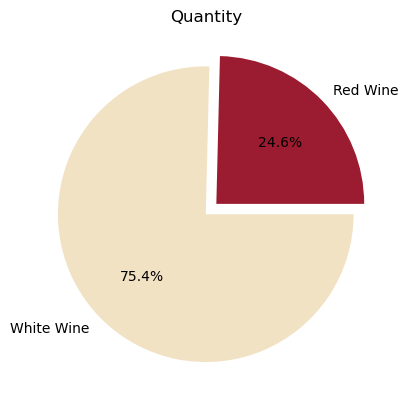

In [ ]:
x = len(red_wine)
y = len(white_wine)

fig, ax = plt.subplots()
ax.pie([x,y],explode = [0.1,0], labels = ["Red Wine", "White Wine"],autopct='%1.1f%%', colors = ["#9B1B30","#F2E2C4"])
ax.set_title("Quantity")
plt.show()

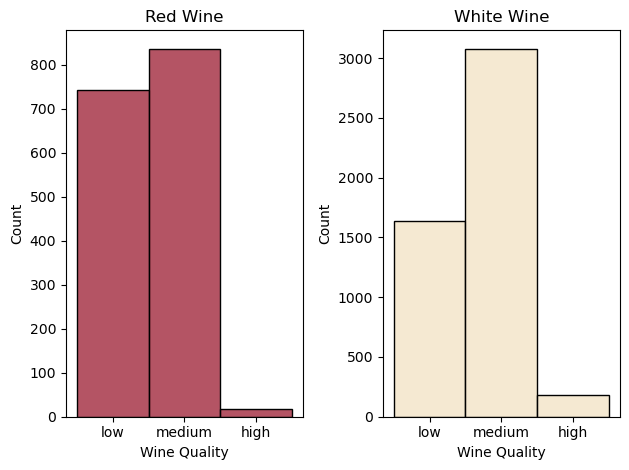

In [ ]:
fig, ax = plt.subplots(1,2)
red = sns.histplot(x = red_wine["quality_label"], ax = ax[0],color = "#9B1B30")
white = sns.histplot(x = white_wine["quality_label"], ax = ax[1], color ="#F2E2C4")

red.set_xlabel("Wine Quality")
white.set_xlabel("Wine Quality")
red.set_title("Red Wine")
white.set_title("White Wine")
plt.tight_layout()


In [ ]:
# red_wine["quality_label"].value_counts()
red_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

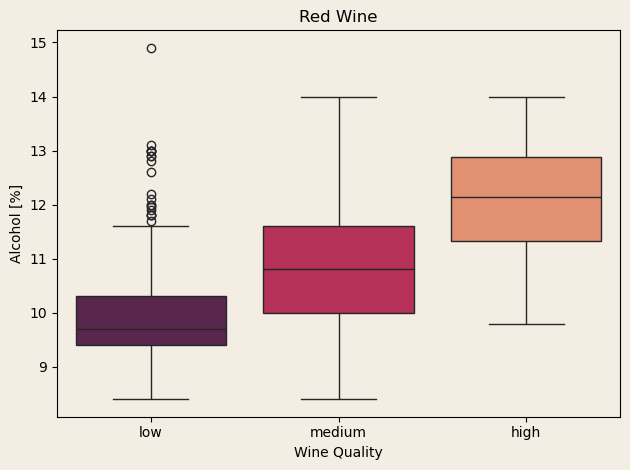

In [ ]:
fig = plt.figure()
red = sns.boxplot(data = red_wine, x = red_wine["quality_label"],y =red_wine["alcohol"],hue = "quality_label", palette = "rocket")

red.set_xlabel("Wine Quality")
# white.set_xlabel("Wine Quality")
red.set_ylabel("Alcohol [%]")
red.set_title("Red Wine")
# white.set_title("White Wine")
fig.patch.set_facecolor('#f3ede3')
red.set_facecolor("#f3ede3")
# fig.patch.set(lw=10, ec='#800020')
plt.tight_layout()

plt.tight_layout()

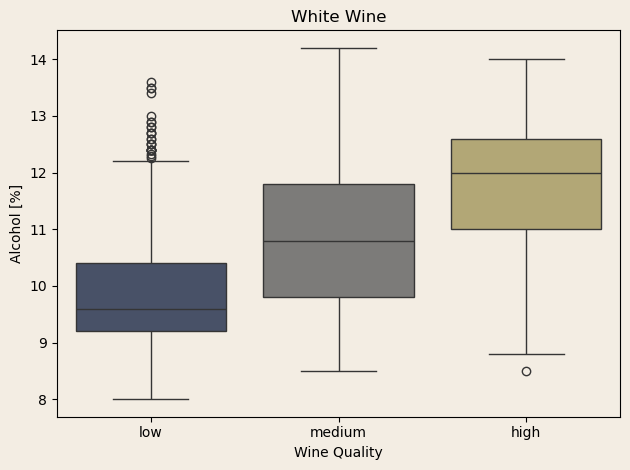

In [ ]:
fig = plt.figure()
white = sns.boxplot(data = white_wine, x = white_wine["quality_label"],y =white_wine["alcohol"],hue = "quality_label", palette = "cividis")

white.set_xlabel("Wine Quality")
# white.set_xlabel("Wine Quality")
white.set_ylabel("Alcohol [%]")
white.set_title("White Wine")
# white.set_title("White Wine")
fig.patch.set_facecolor('#f3ede3')
white.set_facecolor("#f3ede3")
# fig.patch.set(lw=10, ec='#800020')
plt.tight_layout()

plt.tight_layout()

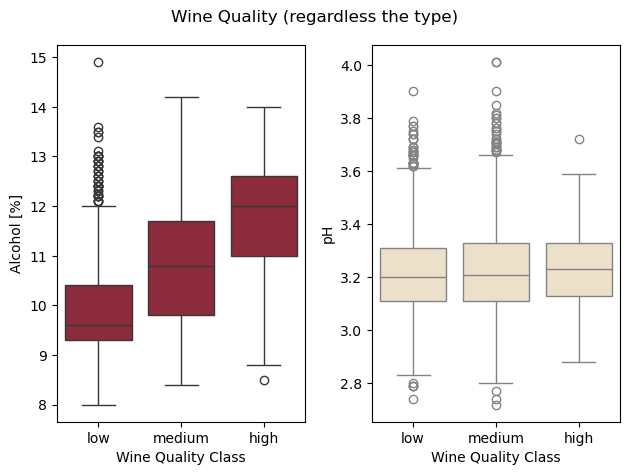

In [ ]:
fig, ax = plt.subplots(1,2)

combined_wine_alc = pd.concat([red_wine[["quality_label", "alcohol"]],
                            white_wine[["quality_label", "alcohol"]]])

combined_wine_ph = pd.concat([red_wine[["quality_label", "pH"]],
                            white_wine[["quality_label", "pH"]]])

#sns.boxplot(data=combined_wine, color ={"Red Wine": "#9B1B30", "White Wine": "#F2E2C4"})

alc = sns.boxplot(x = combined_wine_alc["quality_label"],y = combined_wine_alc["alcohol"], ax = ax[0], color = "#9B1B30")
pH = sns.boxplot(x = combined_wine_ph["quality_label"],y = combined_wine_ph["pH"], ax = ax[1], color ="#F2E2C4")

alc.set_xlabel("Wine Quality Class")
alc.set_ylabel("Alcohol [%]")
pH.set_xlabel("Wine Quality Class")
pH.set_ylabel("pH")
fig.suptitle("Wine Quality (regardless the type)")
plt.tight_layout()

Axes(0.0969184,0.121412;0.387945x0.847338)
Axes(0.588618,0.121412;0.387945x0.847338)


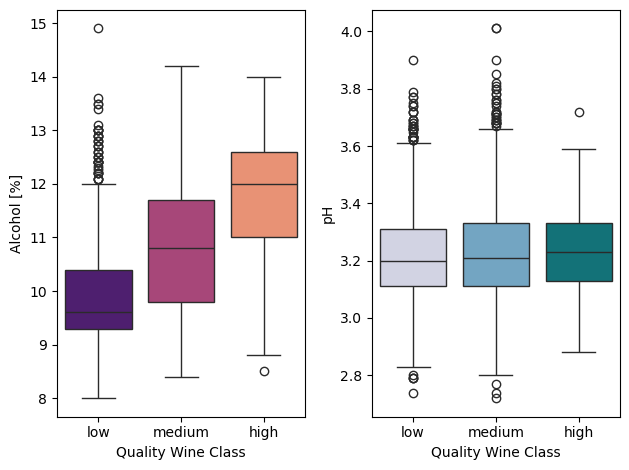

In [ ]:
fig , ax  = plt.subplots(1,2)

#Boxplot Quality/Alcohol
alc = sns.boxplot(x = "quality_label", y = "alcohol", data = all_wines, ax = ax[0],hue = "quality_label", palette="magma")
alc.set_xlabel("Quality Wine Class")
alc.set_ylabel("Alcohol [%]")

#Boxplot Quality/pH
ph = sns.boxplot(x = "quality_label", y= "pH", data = all_wines, ax = ax[1], hue = "quality_label", palette="PuBuGn")
ph.set_xlabel("Quality Wine Class")
ph.set_ylabel("pH")

plt.tight_layout()
print(alc)
print(ph)

### Checking correlation between wine parameters and wine quality

#### Chlorides

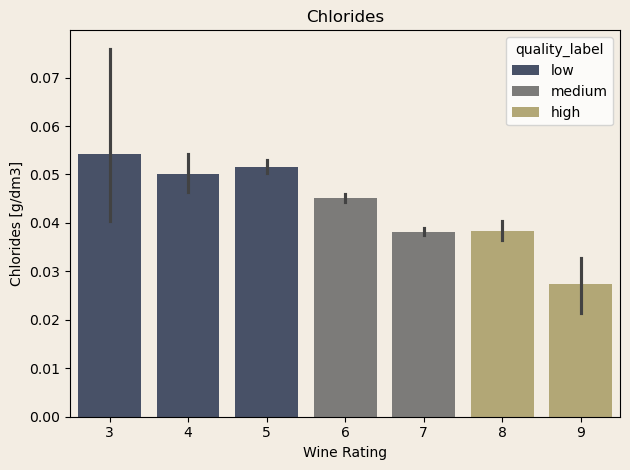

In [ ]:
fig = plt.figure()

chlorides_quality = sns.barplot(x = "quality", y = "chlorides", data = white_wine, hue = "quality_label", palette="cividis")
chlorides_quality.set_xlabel("Wine Rating")
chlorides_quality.set_ylabel("Chlorides [g/dm3]")


# chlorides_quality_1 = sns.scatterplot(x = "quality", y = "chlorides", data = all_wines, ax = ax[1], hue = "quality_label", palette="Oranges")
# chlorides_quality_1.set_xlabel("Wine Rating")
# chlorides_quality_1.set_ylabel("Chlorides [g/dm3]")

fig.patch.set_facecolor('#f3ede3')

ax = plt.gca()  
# Setting Background colour yellow 

ax.set_facecolor("#f3ede3")
# fig.patch.set(lw=10, ec='#800020')
plt.title("Chlorides")
plt.tight_layout()



#### Density

##### White Wine

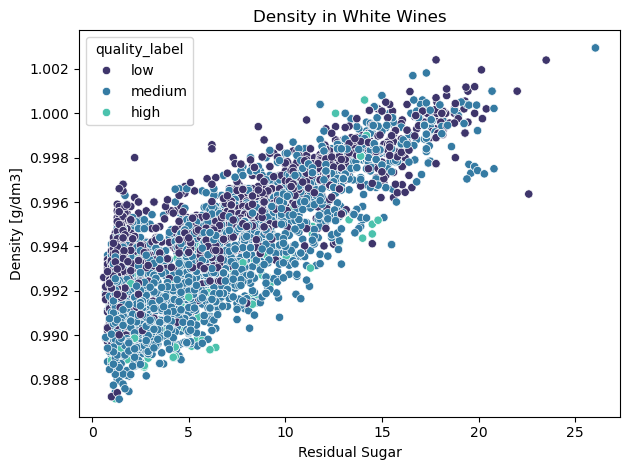

In [ ]:
fig = plt.figure()
filtered = white_wine[white_wine["density"]<1.01]

density_quality = sns.scatterplot(x = "residual_sugar", y = "density", data= filtered, hue = "quality_label", palette="mako")

density_quality.set_xlabel("Residual Sugar")
density_quality.set_ylabel("Density [g/dm3]")

plt.title("Density in White Wines")
plt.tight_layout()


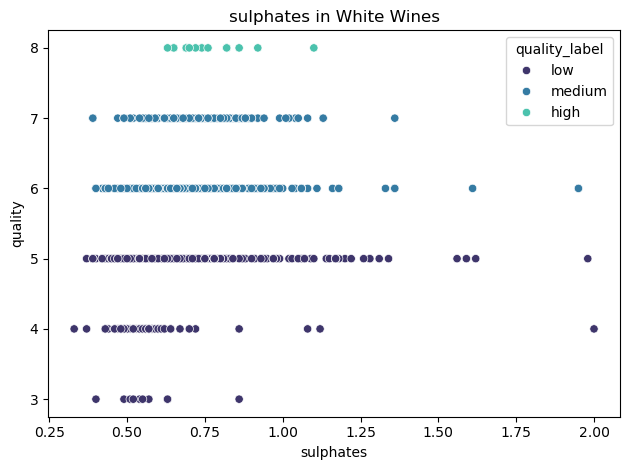

In [ ]:
fig = plt.figure()


density_quality = sns.scatterplot(x = "sulphates", y = "quality", data= red_wine, hue = "quality_label", palette="mako")

density_quality.set_xlabel("sulphates")
density_quality.set_ylabel("quality")

plt.title("sulphates in White Wines")
plt.tight_layout()

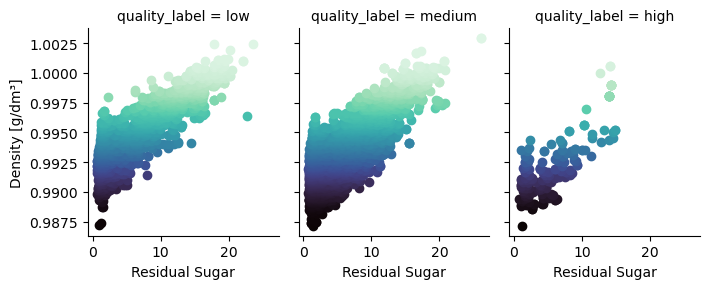

In [ ]:
# Filter white wines with density < 1.01
filtered = white_wine[white_wine["density"] < 1.01]

# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(filtered, col="quality_label", aspect=0.8, height=3, hue="density", palette="mako")

# Apply hexbin plot for each subset
ax.map(plt.scatter, "residual_sugar", "density")

# Set axis labels
ax.set_axis_labels("Residual Sugar", "Density [g/dm³]")

# Show plot
plt.tight_layout()
plt.show()

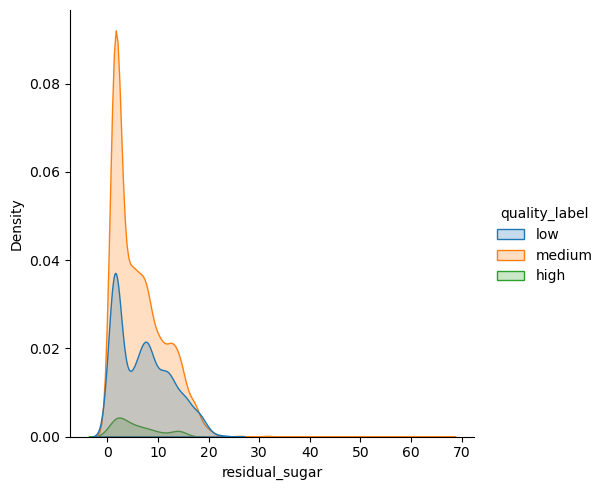

In [ ]:
sns.displot(white_wine, x="residual_sugar", hue="quality_label", kind="kde", fill=True)

##### Red Wine

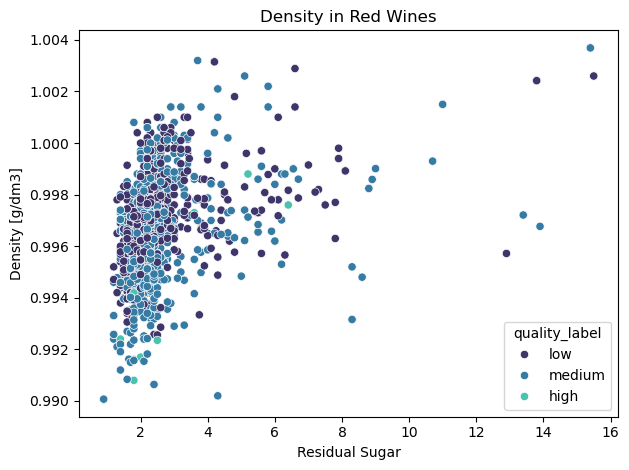

In [ ]:
density_quality = sns.scatterplot(x = "residual_sugar", y = "density", data= red_wine, hue = "quality_label", palette="mako")

density_quality.set_xlabel("Residual Sugar")
density_quality.set_ylabel("Density [g/dm3]")
plt.title("Density in Red Wines")
plt.tight_layout()

Text(0, 0.5, 'Density')

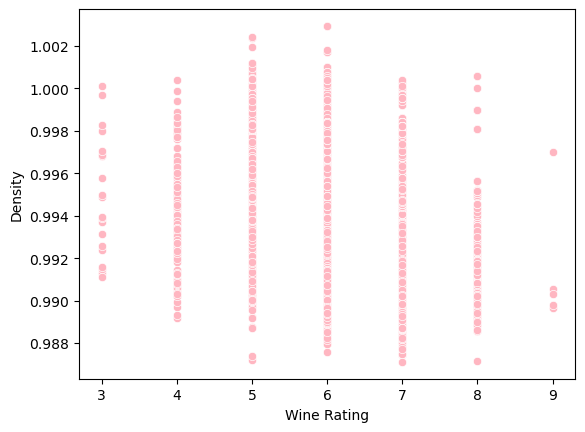

In [ ]:
filtered = white_wine[white_wine["density"]< 1.01]
dens_white = sns.scatterplot(x = "quality", y = "density", data = filtered, color = "#ffb6c1")
dens_white.set_xlabel("Wine Rating")
dens_white.set_ylabel("Density")

### Fixed Acidity

Text(0, 0.5, 'Fixed Acidity')

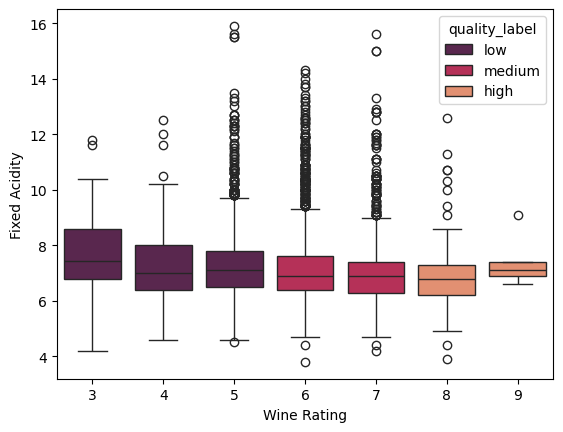

In [ ]:
fixed_acidity = sns.boxplot(x = "quality", y = "fixed_acidity", data = all_wines, hue = "quality_label", palette="rocket")
fixed_acidity.set_xlabel("Wine Rating")
fixed_acidity.set_ylabel("Fixed Acidity")


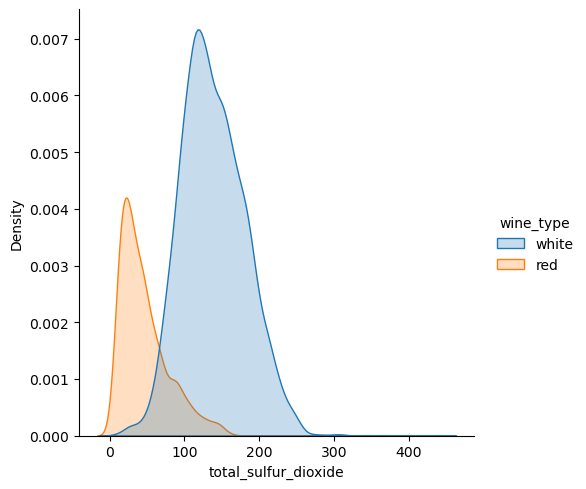

In [ ]:
sns.displot(all_wines, x="total_sulfur_dioxide", hue="wine_type", kind="kde", fill=True)

### Free SO2 to Total

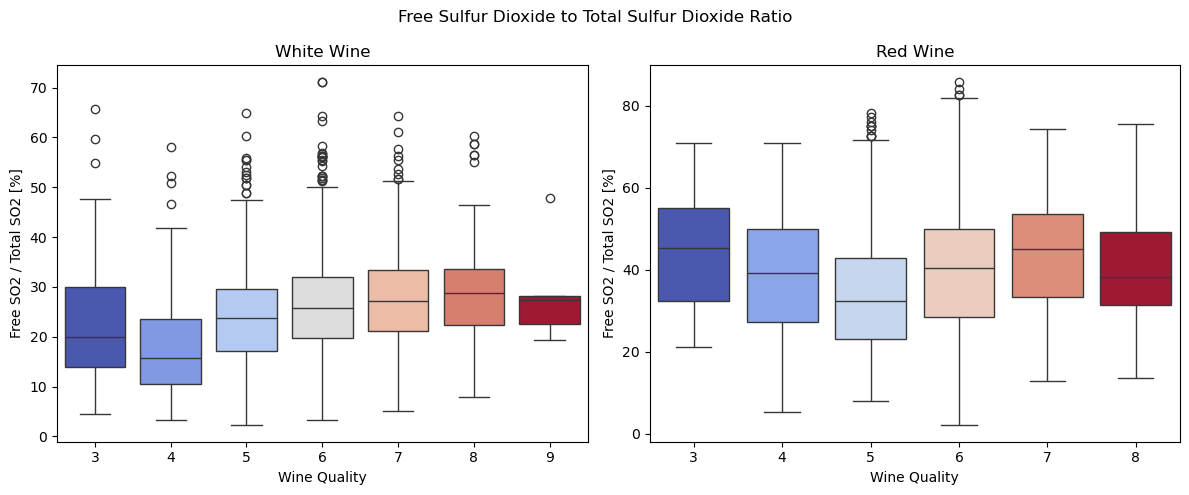

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))




white_wine["SO2_ratio"] = (white_wine["free_sulfur_dioxide"]/white_wine["total_sulfur_dioxide"])*100
red_wine["SO2_ratio"] = (red_wine["free_sulfur_dioxide"]/red_wine["total_sulfur_dioxide"])*100
all_wines = pd.concat([red_wine,white_wine], axis= 0)



white_ratio  = sns.boxplot(x = "quality", y = "SO2_ratio", data = white_wine, ax = ax[0], hue = "quality", palette="coolwarm",legend = False)
white_ratio.set_xlabel("Wine Quality")
white_ratio.set_ylabel("Free SO2 / Total SO2 [%]")
ax[0].set_title("White Wine")

                                  
red_ratio = sns.boxplot(x = "quality", y = "SO2_ratio", data = red_wine, ax = ax[1], hue = "quality", palette="coolwarm", legend = False)
red_ratio.set_xlabel("Wine Quality")
red_ratio.set_ylabel("Free SO2 / Total SO2 [%]")
ax[1].set_title("Red Wine")


fig.suptitle("Free Sulfur Dioxide to Total Sulfur Dioxide Ratio")
plt.tight_layout()



In [ ]:
white_wine["alc_acid_ratio"] = (white_wine["alcohol"]/white_wine["fixed_acidity"])*100
red_wine["alc_acid_ratio"] = (red_wine["alcohol"]/red_wine["fixed_acidity"])*100
all_wines = pd.concat([red_wine,white_wine], axis= 0)


#### pH vs SO2

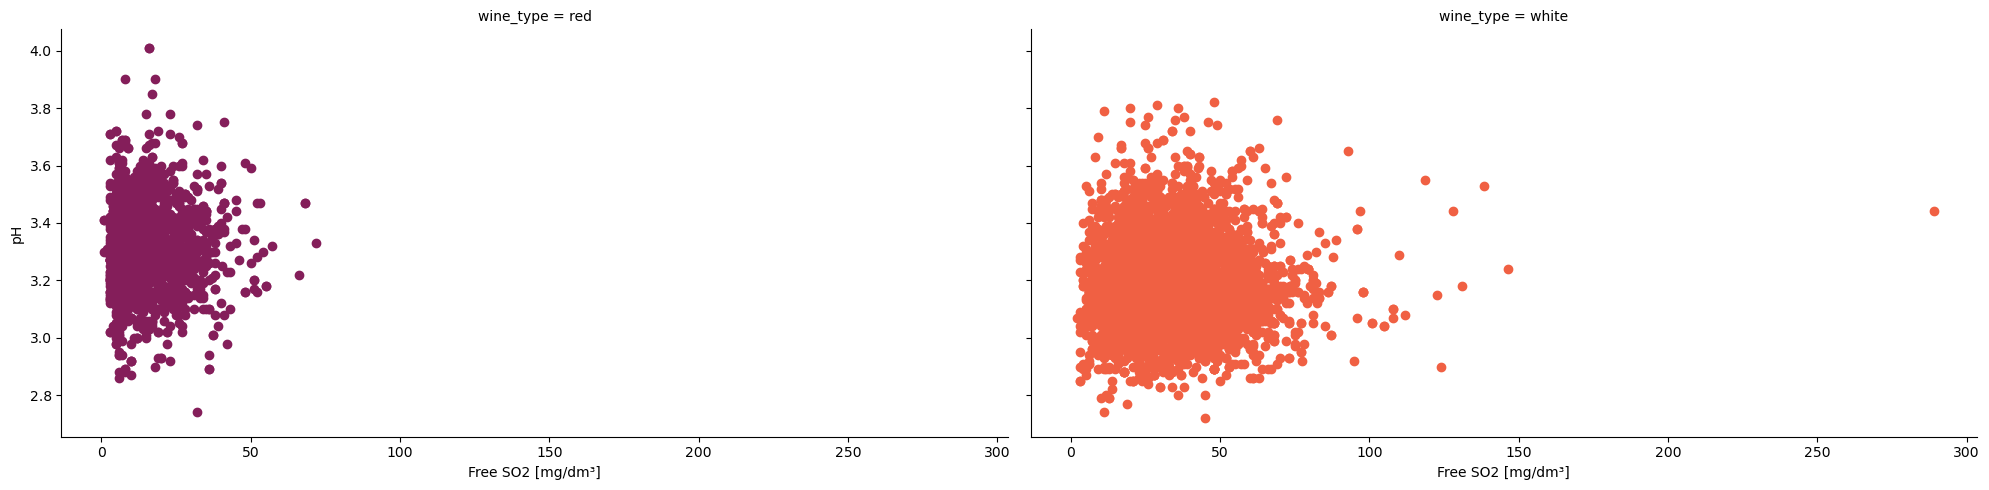

In [ ]:
# # fig, ax = plt.subplot()

# pH_so2 = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = red_wine, hue = "quality_label", palette="rocket")
# pH_so2.set_xlabel("Free SO2")
# pH_so2.set_ylabel("pH")

# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(all_wines, col="wine_type", aspect=2.0, height=5, hue="wine_type", palette="rocket")

ax.map(plt.scatter, "free_sulfur_dioxide", "pH")

# Set axis labels
ax.set_axis_labels("Free SO2 [mg/dm³]", "pH")

# Show plot
plt.tight_layout()
plt.show()

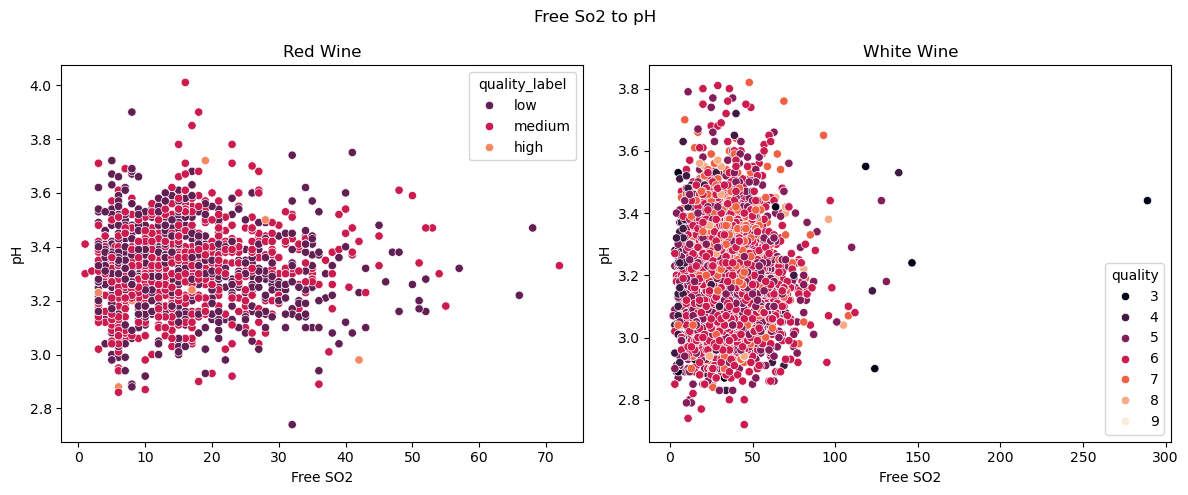

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = red_wine, ax = ax[0], hue="quality_label", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("pH")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "pH", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("pH")
ax[1].set_title("White Wine")


fig.suptitle("Free So2 to pH")
plt.tight_layout()

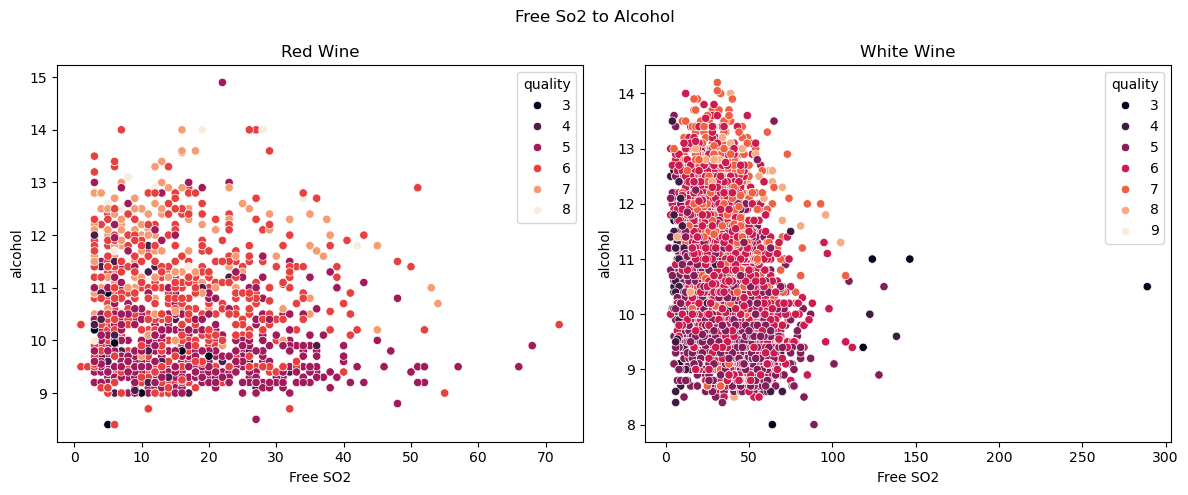

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "alcohol", data = red_wine, ax = ax[0], hue="quality", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("alcohol")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "alcohol", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("alcohol")
ax[1].set_title("White Wine")


fig.suptitle("Free So2 to Alcohol")
plt.tight_layout()

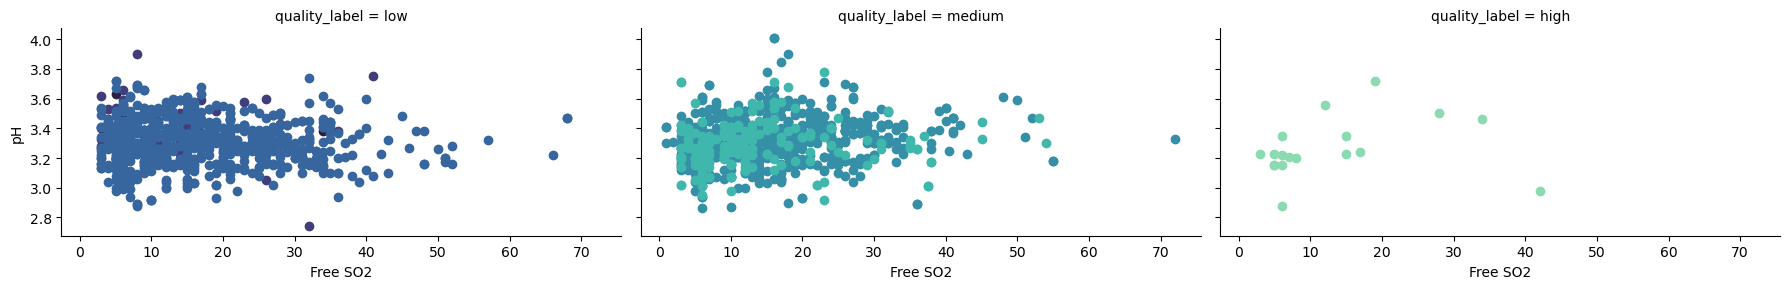

In [ ]:
# Create FacetGrid for separate plots based on quality_label
ax = sns.FacetGrid(red_wine, col="quality_label", aspect=2.0, height=3,hue = "quality", palette="mako")

# Apply hexbin plot for each subset
ax.map(plt.scatter, "free_sulfur_dioxide", "pH")

# Set axis labels
ax.set_axis_labels("Free SO2", "pH")

# Show plot
plt.tight_layout()
plt.show()

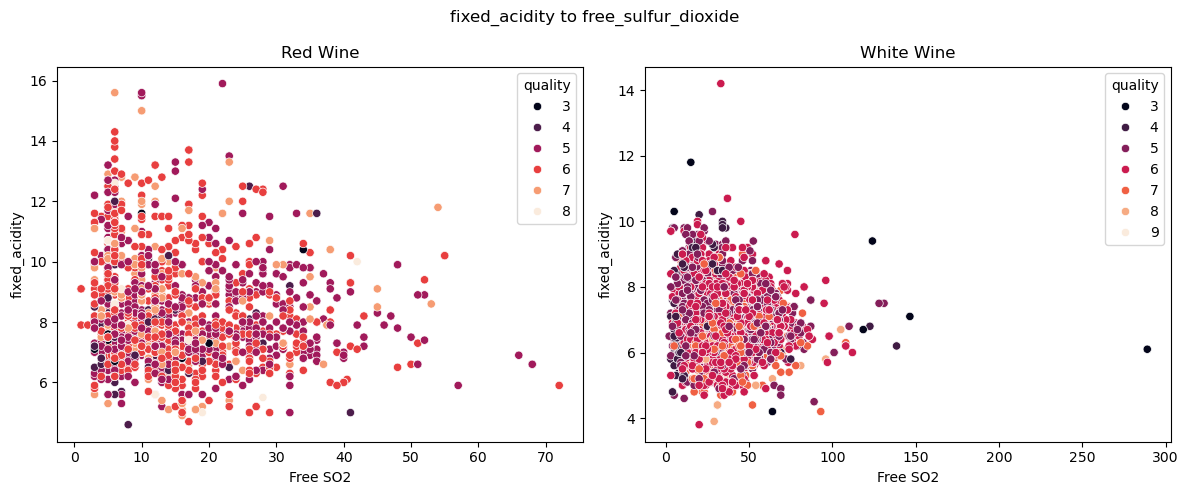

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

pH_so2_red = sns.scatterplot(x = "free_sulfur_dioxide", y = "fixed_acidity", data = red_wine, ax = ax[0], hue="quality", palette="rocket")
pH_so2_red.set_xlabel("Free SO2")
pH_so2_red.set_ylabel("fixed_acidity")
ax[0].set_title("Red Wine")
                                 
pH_so2_white = sns.scatterplot(x = "free_sulfur_dioxide", y = "fixed_acidity", data = white_wine, ax = ax[1],hue="quality", palette="rocket")
pH_so2_white.set_xlabel("Free SO2")
pH_so2_white.set_ylabel("fixed_acidity")
ax[1].set_title("White Wine")


fig.suptitle("fixed_acidity to free_sulfur_dioxide")
plt.tight_layout()

In [ ]:
count_white = 0
for value in white_wine[white_wine["quality_label"] == "high"]["quality_label"]:
    count_white = count_white +1
count_red = 0
for value in red_wine[red_wine["quality_label"] == "high"]["quality_label"]:
    count_red = count_red +1

print(count_white)
print(count_red)

180
18


<Figure size 640x480 with 0 Axes>

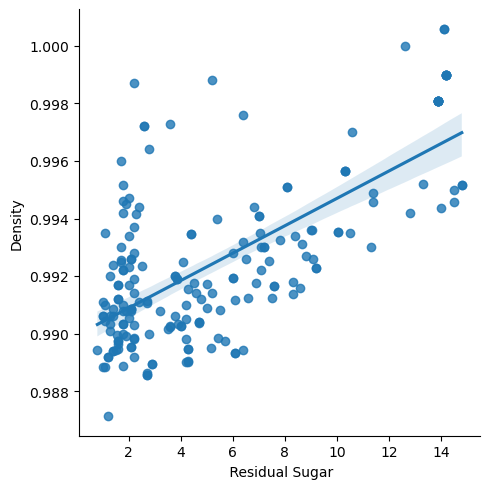

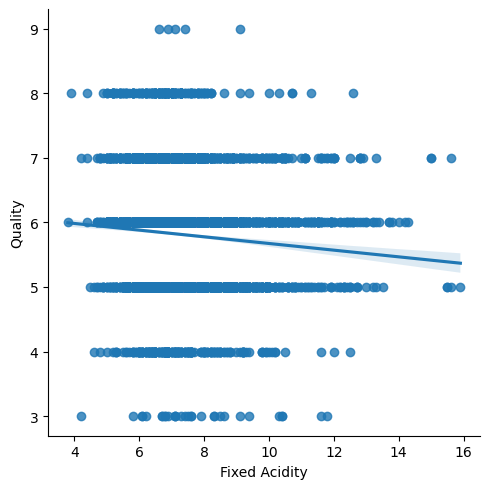

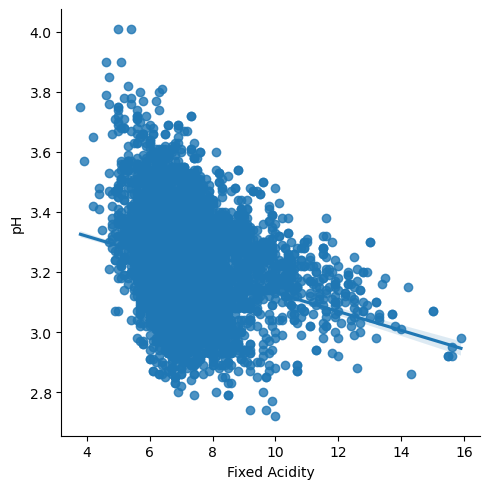

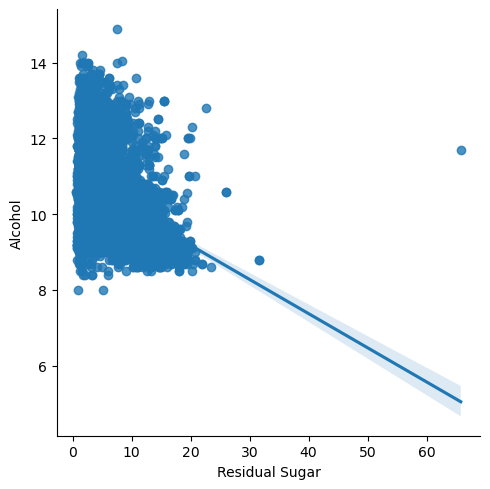

In [ ]:
fig = plt.figure()

combined_wine_values = pd.concat([red_wine, white_wine])


high_quality_wine = combined_wine_values[combined_wine_values["quality_label"] == "high"]
# remove_outliers = combined_wine_values[combined_wine_values["density"] < 1.01]

# x = sns.scatterplot(x = high_quality_wine["density"],y = high_quality_wine["residual_sugar"])
x = sns.lmplot(data = high_quality_wine, x = "residual_sugar",y = "density")
x.set_xlabels(" Residual Sugar")
x.set_ylabels("Density")

y = sns.lmplot(data = combined_wine_values, x = "fixed_acidity", y = "quality")
y.set_xlabels("Fixed Acidity")
y.set_ylabels("Quality")

z = sns.lmplot(data = combined_wine_values, x = "fixed_acidity", y = "pH")
z.set_xlabels("Fixed Acidity")
z.set_ylabels("pH")

z = sns.lmplot(data = combined_wine_values, x = "residual_sugar", y = "alcohol")
z.set_xlabels("Residual Sugar")
z.set_ylabels("Alcohol")


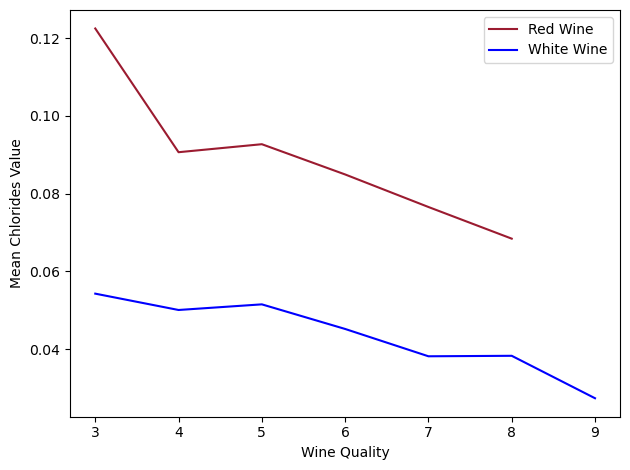

In [ ]:
# mean_chlorides_value = combined_wine_values.groupby("quality")["chlorides"].mean()

# mean_chlorides = sns.lineplot(x = mean_chlorides_value.index, y = mean_chlorides_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Chlorides [g/dm³]")
fig, ax = plt.subplots(1,1)
mean_chlorides_value_red = red_wine.groupby("quality")["chlorides"].mean()

mean_chlorides_red = sns.lineplot(x = mean_chlorides_value_red.index, y = mean_chlorides_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Chlorides Value")

mean_chlorides_value_white = white_wine.groupby("quality")["chlorides"].mean()

mean_chlorides_white = sns.lineplot(x = mean_chlorides_value_white.index, y = mean_chlorides_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

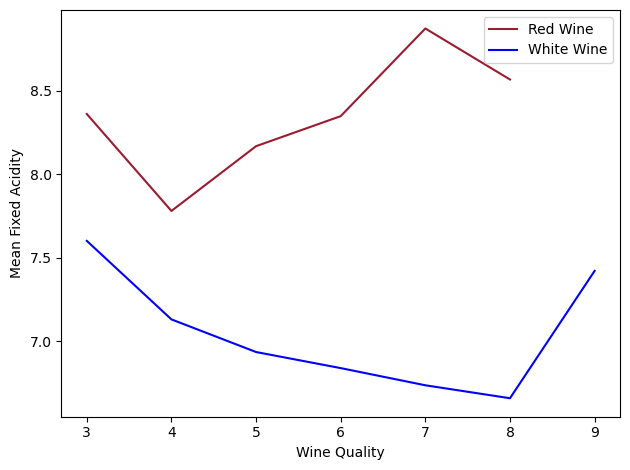

In [ ]:
fig, ax = plt.subplots(1,1)
mean_chlorides_value_red = red_wine.groupby("quality")["fixed_acidity"].mean()

mean_chlorides_red = sns.lineplot(x = mean_chlorides_value_red.index, y = mean_chlorides_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Fixed Acidity")

mean_chlorides_value_white = white_wine.groupby("quality")["fixed_acidity"].mean()

mean_chlorides_white = sns.lineplot(x = mean_chlorides_value_white.index, y = mean_chlorides_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

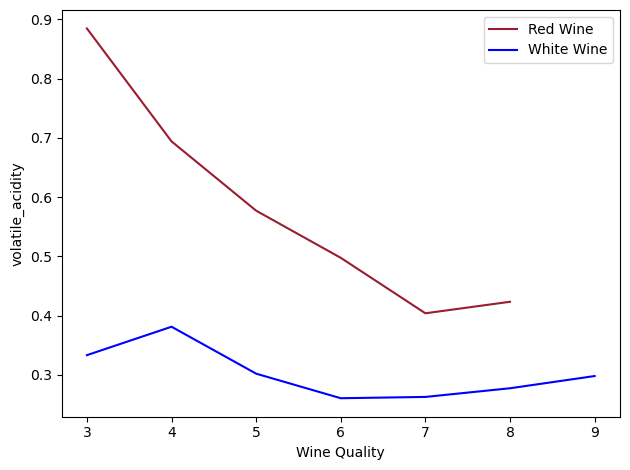

In [ ]:
fig, ax = plt.subplots(1,1)
mean_volatile_acidity_red = red_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_acidity = sns.lineplot(x = mean_volatile_acidity_red.index, y = mean_volatile_acidity_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("volatile_acidity")

mean_volatile_acidity_white = white_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_acidity = sns.lineplot(x = mean_volatile_acidity_white.index, y = mean_volatile_acidity_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

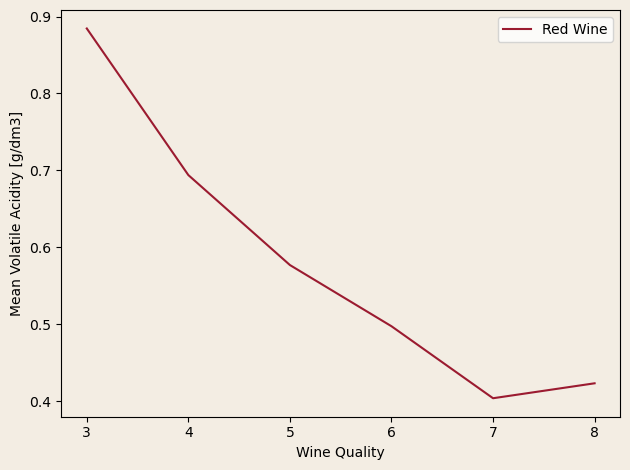

In [ ]:
fig = plt.figure()

mean_volatile_acidity_red = red_wine.groupby("quality")["volatile_acidity"].mean()

volatile_acidity_red = sns.lineplot(x = mean_volatile_acidity_red.index, y = mean_volatile_acidity_red.values, color="#9B1B30", label = "Red Wine")
volatile_acidity_red.set_xlabel("Wine Quality")
volatile_acidity_red.set_ylabel("Mean Volatile Acidity [g/dm3]")

fig.patch.set_facecolor('#f3ede3')

ax = plt.gca()  
# Setting Background colour yellow 

ax.set_facecolor("#f3ede3")

plt.tight_layout()
plt.show()

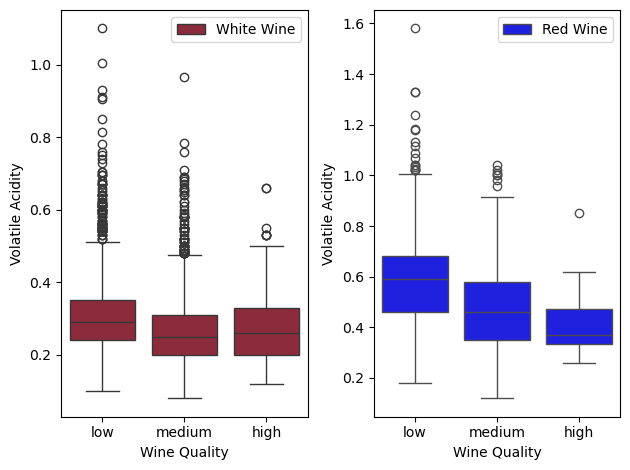

In [ ]:
fig, ax = plt.subplots(1,2)


volatile_acidity_white = sns.boxplot(x = white_wine["quality_label"],y = white_wine["volatile_acidity"],ax = ax[0], color="#9B1B30", label = "White Wine")
ax[0].set_xlabel("Wine Quality")
ax[0].set_ylabel("Volatile Acidity")


volatile_acidity_red = sns.boxplot(x = red_wine["quality_label"],y = red_wine["volatile_acidity"], ax = ax[1], color="blue", label = "Red Wine")
ax[1].set_xlabel("Wine Quality")
ax[1].set_ylabel("Volatile Acidity")

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Quality of wine'), Text(0, 0.5, 'Alcohol [%]')]

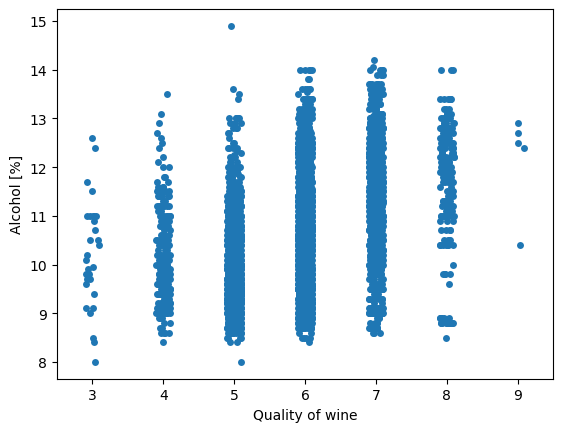

In [ ]:
r = sns.stripplot(data = combined_wine_values, x = "quality", y = "alcohol")
r.set(xlabel = "Quality of wine", ylabel = "Alcohol [%]", )


In [ ]:
# count = 0
# for value in white_wine["alcohol"]:
#     if value > 11.5 and white_wine["quality_label"] == "high":
#         count = count + 1
# print(count)
count = ((white_wine["alcohol"] > 11.5) & (white_wine["quality_label"] == "high")).sum()
print(count)

count1 = (white_wine["quality_label"]=="high").sum()
print(count1)

print(f"{(count/count1)*100} %")

###61% win białych o wysokiej jakosci to wina z regionu Moncao


110
180
61.111111111111114 %


In [ ]:
count = ((red_wine["alcohol"] > 11.5) & (red_wine["quality_label"] == "high")).sum()
print(count)

count1 = (red_wine["quality_label"]=="high").sum()
print(count1)

print(f"{(count/count1)*100} %")

12
18
66.66666666666666 %


In [ ]:
count = ((all_wines["alcohol"] > 11.5) & (all_wines["quality_label"] == "high")).sum()
print(count)

count1 = (all_wines["quality_label"]=="high").sum()
print(count1)

print(f"{(count/count1)*100} %")

122
198
61.61616161616161 %


In [ ]:
count = ((white_wine["alcohol"] > 11.5) & (white_wine["quality_label"] == "low")).sum()
print(count)

count1 = (all_wines["quality_label"] == "low").sum()
print(count1)

print(f"{(count/count1)*100} %")

74
2384
3.104026845637584 %


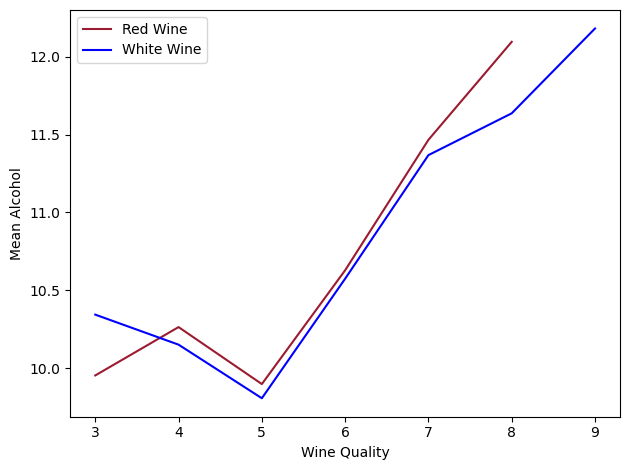

Data is not normally distributed


In [ ]:
# for white and red plot looks very similar, which means I can combine both wines

fig, ax = plt.subplots(1,1)
mean_chlorides_value_red = red_wine.groupby("quality")["alcohol"].mean()

mean_chlorides_red = sns.lineplot(x = mean_chlorides_value_red.index, y = mean_chlorides_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Alcohol")

mean_chlorides_value_white = white_wine.groupby("quality")["alcohol"].mean()

mean_chlorides_white = sns.lineplot(x = mean_chlorides_value_white.index, y = mean_chlorides_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()
from scipy import stats
# For alcohol content (example with red wine)
_, p_value = stats.shapiro(red_wine['alcohol'])
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

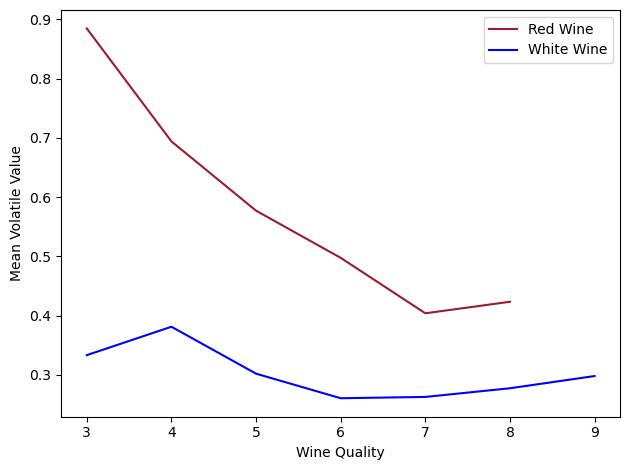

In [ ]:
fig, ax = plt.subplots(1,1)
# mean_volatile_value = combined_wine_values.groupby("quality")["volatile_acidity"].mean()

# mean_volatile = sns.lineplot(x = mean_volatile_value.index, y = mean_volatile_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Volatile Acidity Value")

mean_volatile_value_red = red_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_red = sns.lineplot(x = mean_volatile_value_red.index, y = mean_volatile_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Volatile Value")

mean_volatile_value_white = white_wine.groupby("quality")["volatile_acidity"].mean()

mean_volatile_white = sns.lineplot(x = mean_volatile_value_white.index, y = mean_volatile_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

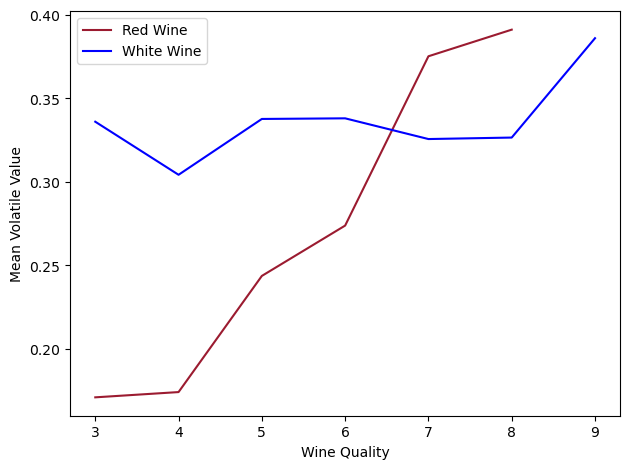

In [ ]:
fig, ax = plt.subplots(1,1)
mean_citric_acid_value_red = red_wine.groupby("quality")["citric_acid"].mean()

mean_citric_acid_red = sns.lineplot(x = mean_citric_acid_value_red.index, y = mean_citric_acid_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Volatile Value")

mean_citric_acid_value_white = white_wine.groupby("quality")["citric_acid"].mean()

mean_volatile_white = sns.lineplot(x = mean_citric_acid_value_white.index, y = mean_citric_acid_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

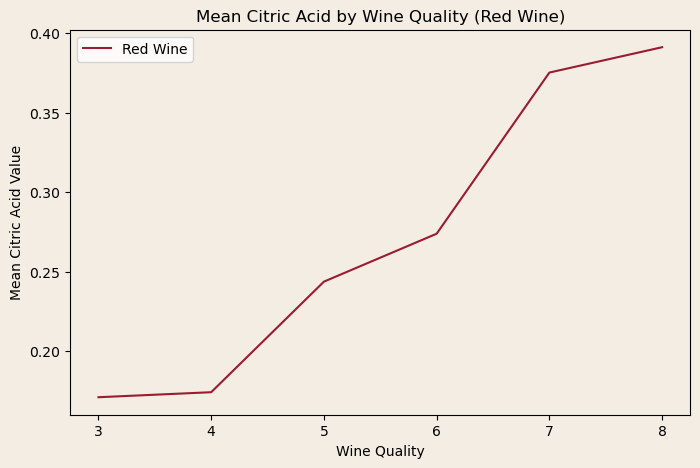

In [ ]:
# Create figure
plt.figure(figsize=(8, 5), facecolor='#f3ede3')  # Set background color for the figure

# Compute mean citric acid values for red wine
mean_citric_acid_value_red = red_wine.groupby("quality")["citric_acid"].mean()

# Create the line plot
sns.lineplot(x=mean_citric_acid_value_red.index, 
             y=mean_citric_acid_value_red.values, 
             color="#9B1B30",  # Burgundy color for red wine
             label="Red Wine")

# Set labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Mean Citric Acid Value")
plt.title("Mean Citric Acid by Wine Quality (Red Wine)")

ax = plt.gca()  
ax.set_facecolor("#f3ede3")
# Show the plot
plt.show()

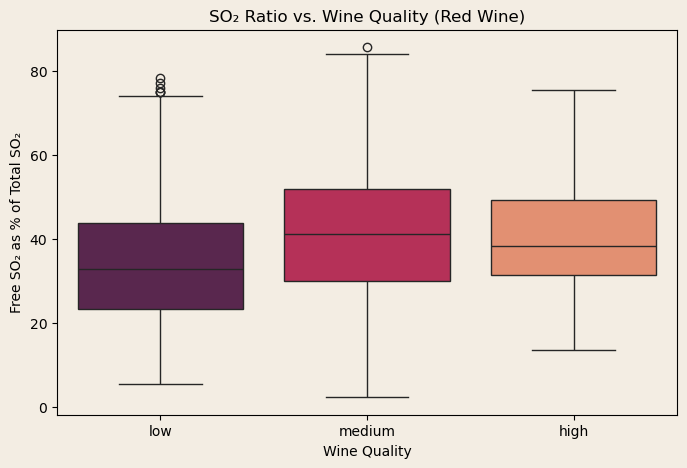

In [ ]:
# Set background color for the entire figure
plt.figure(figsize=(8, 5), facecolor='#f3ede3')


# Create the boxplot
sns.boxplot(data=red_wine, x="quality_label", y="SO2_ratio", hue="quality_label", palette="rocket")

# Set labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Free SO₂ as % of Total SO₂")
plt.title("SO₂ Ratio vs. Wine Quality (Red Wine)")
ax = plt.gca()  
ax.set_facecolor("#f3ede3")
# Show the plot
plt.show()


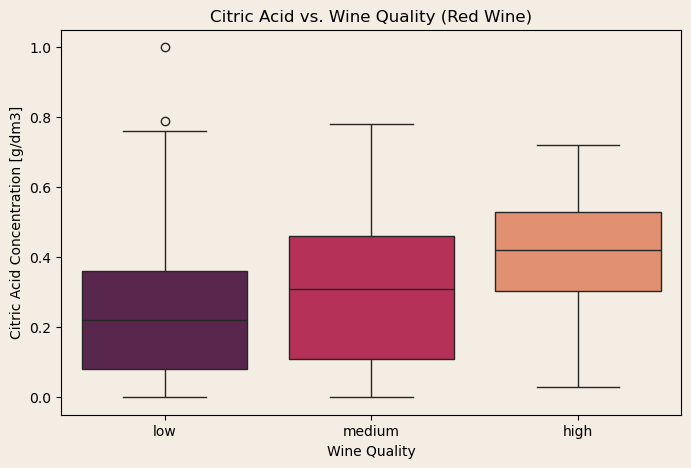

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set background color for the entire figure
plt.figure(figsize=(8, 5), facecolor='#f3ede3')

# Create the boxplot for citric acid vs. quality label
sns.boxplot(data=red_wine, x="quality_label", y="citric_acid", hue="quality_label", palette="rocket")

# Set labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Citric Acid Concentration [g/dm3]")
plt.title("Citric Acid vs. Wine Quality (Red Wine)")

ax = plt.gca()  
ax.set_facecolor("#f3ede3")
# Show the plot
plt.show()


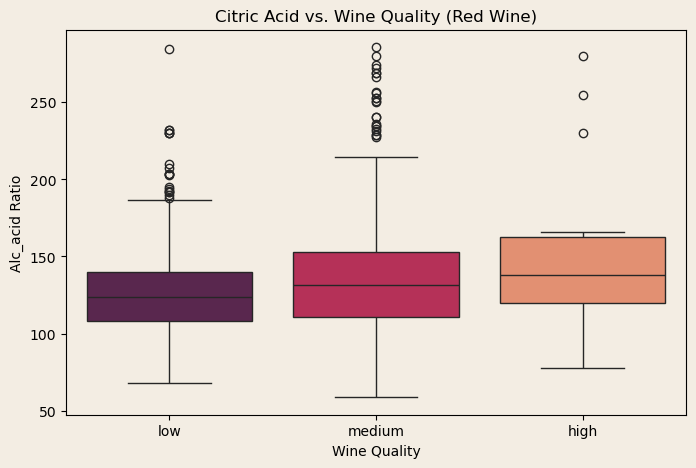

In [ ]:
# Set background color for the entire figure
plt.figure(figsize=(8, 5), facecolor='#f3ede3')

# Create the boxplot for citric acid vs. quality label
sns.boxplot(data=red_wine, x="quality_label", y="alc_acid_ratio", hue="quality_label", palette="rocket")

# Set labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Alc_acid Ratio")
plt.title("Citric Acid vs. Wine Quality (Red Wine)")

ax = plt.gca()  
ax.set_facecolor("#f3ede3")
# Show the plot
plt.show()

D:\Users\Olunia\AppData\Local\Temp\ipykernel_41800\2231549091.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_SO2_ratio_red = red_wine.groupby("quality_label")["SO2_ratio"].mean()


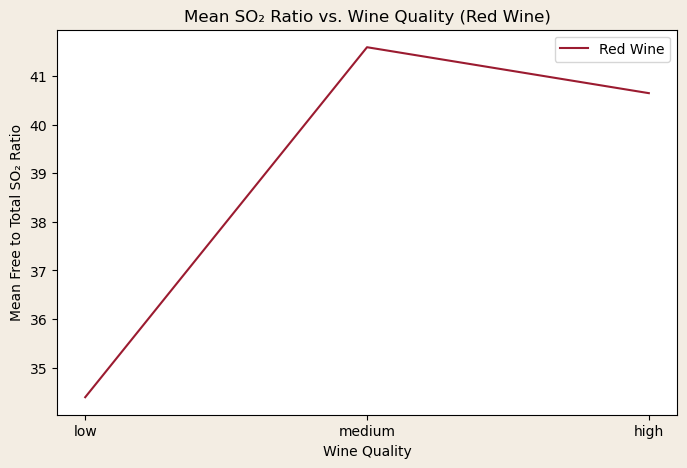

In [ ]:

# Set background color for the entire figure
plt.figure(figsize=(8, 5), facecolor='#f3ede3')
# Calculate mean SO₂ ratio per quality label
mean_SO2_ratio_red = red_wine.groupby("quality_label")["SO2_ratio"].mean()

# Create the lineplot for the mean SO₂ ratio
sns.lineplot(x=mean_SO2_ratio_red.index, 
             y=mean_SO2_ratio_red.values, 
             color="#9B1B30",  # Burgundy color for red wine
             label="Red Wine")

# Set labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Mean Free to Total SO₂ Ratio")
plt.title("Mean SO₂ Ratio vs. Wine Quality (Red Wine)")

# Show the plot
plt.show()

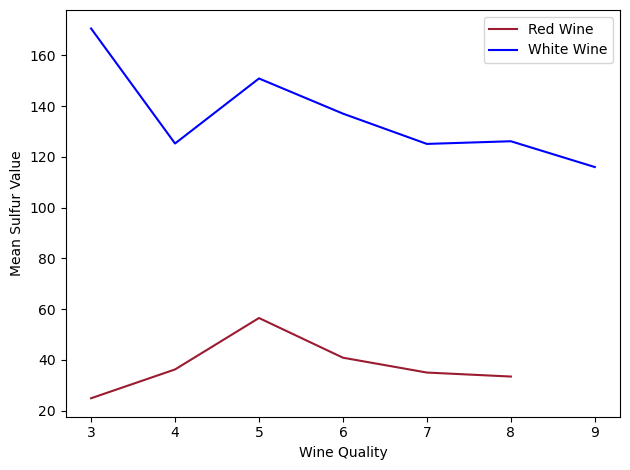

In [ ]:
# mean_sulfur_value = combined_wine_values.groupby("quality")["total_sulfur_dioxide"].mean()

# mean_sulfur = sns.lineplot(x = mean_sulfur_value.index, y = mean_sulfur_value.values, color="#9B1B30")
# plt.xlabel("Wine Quality")
# plt.ylabel("Mean Sulfur Dioxide Value")

fig, ax = plt.subplots(1,1)
mean_sulfur_value_red = red_wine.groupby("quality")["total_sulfur_dioxide"].mean()

mean_sulfur_red = sns.lineplot(x = mean_sulfur_value_red.index, y = mean_sulfur_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Sulfur Value")

mean_sulfur_value_white = white_wine.groupby("quality")["total_sulfur_dioxide"].mean()

mean_sulfur_white = sns.lineplot(x = mean_sulfur_value_white.index, y = mean_sulfur_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

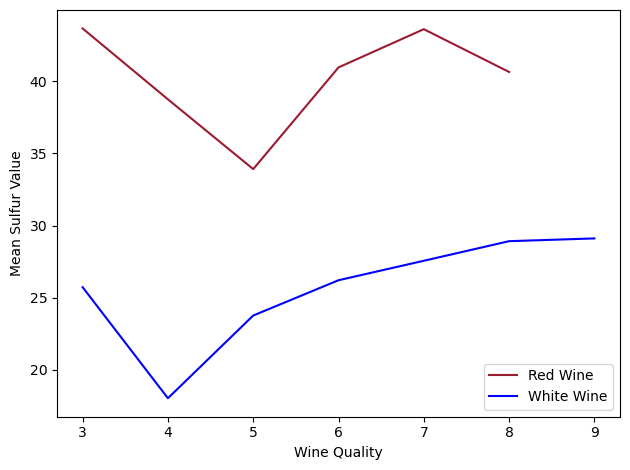

In [ ]:
fig, ax = plt.subplots(1,1)
mean_sulfur_value_red = red_wine.groupby("quality")["SO2_ratio"].mean()

mean_sulfur_red = sns.lineplot(x = mean_sulfur_value_red.index, y = mean_sulfur_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Sulfur Value")

mean_sulfur_value_white = white_wine.groupby("quality")["SO2_ratio"].mean()

mean_sulfur_white = sns.lineplot(x = mean_sulfur_value_white.index, y = mean_sulfur_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

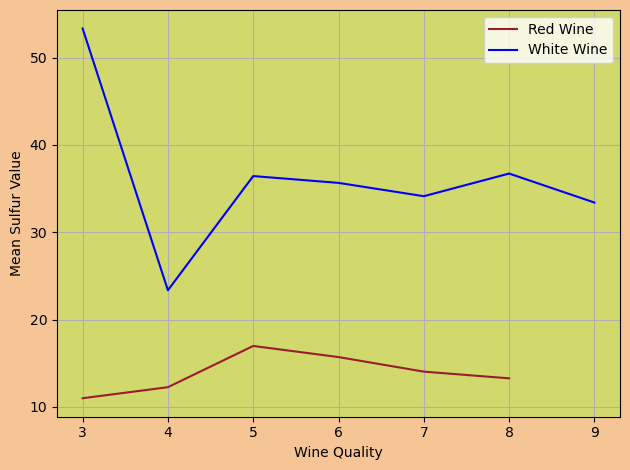

In [ ]:
fig, ax = plt.subplots(1,1)
mean_sulfur_value_red = red_wine.groupby("quality")["free_sulfur_dioxide"].mean()

mean_sulfur_red = sns.lineplot(x = mean_sulfur_value_red.index, y = mean_sulfur_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Sulfur Value")

mean_sulfur_value_white = white_wine.groupby("quality")["free_sulfur_dioxide"].mean()

mean_sulfur_white = sns.lineplot(x = mean_sulfur_value_white.index, y = mean_sulfur_value_white.values, ax = ax, color="blue", label = "White Wine")

fig.patch.set_facecolor('#F5C595')
ax.set_facecolor('#D1D96C')
ax.grid()
plt.tight_layout()
plt.show()

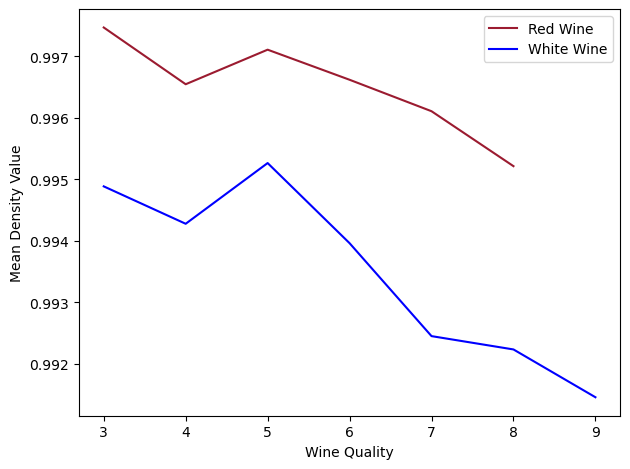

In [ ]:
fig, ax = plt.subplots(1,1)

mean_density_value_red = red_wine.groupby("quality")["density"].mean()

mean_density_red = sns.lineplot(x = mean_density_value_red.index, y = mean_density_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Density Value")

mean_density_value_white = white_wine.groupby("quality")["density"].mean()

mean_density_white = sns.lineplot(x = mean_density_value_white.index, y = mean_density_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()


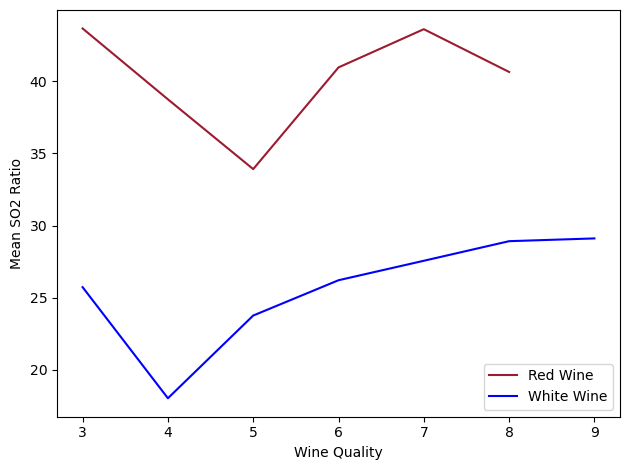

In [ ]:
fig, ax = plt.subplots(1,1)

mean_SO2_ratio_value_red = red_wine.groupby("quality")["SO2_ratio"].mean()

mean_so2ratio_red = sns.lineplot(x = mean_SO2_ratio_value_red.index, y = mean_SO2_ratio_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean SO2 Ratio")

mean_SO2_ratio_value_white = white_wine.groupby("quality")["SO2_ratio"].mean()

mean_so2ratio_white = sns.lineplot(x = mean_SO2_ratio_value_white.index, y = mean_SO2_ratio_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

D:\Users\Olunia\AppData\Local\Temp\ipykernel_41800\970130063.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_SO2_ratio_value_red = red_wine.groupby("quality_label")["SO2_ratio"].mean().reset_index()


<Axes: xlabel='quality_label', ylabel='SO2_ratio'>

<Figure size 640x480 with 0 Axes>

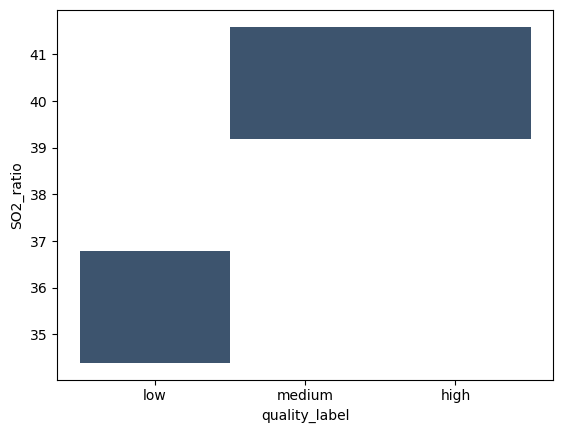

In [ ]:
fig = plt.figure()
# Group by quality and calculate the mean SO2_ratio
mean_SO2_ratio_value_red = red_wine.groupby("quality_label")["SO2_ratio"].mean().reset_index()

# Create the figure
fig = plt.figure()

# Use the grouped data in the line plot
sns.histplot(data=mean_SO2_ratio_value_red, x="quality_label", y="SO2_ratio")
sns.scatterplot()


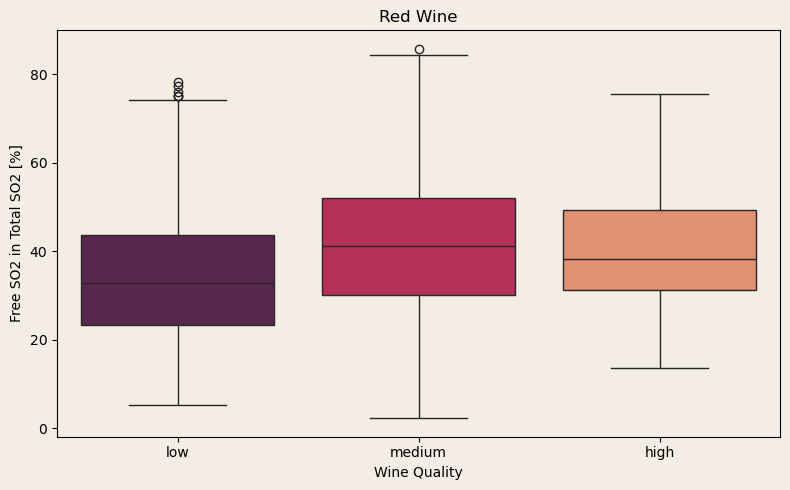

In [ ]:
# Create the scatterplot
fig = plt.figure(figsize=(8, 5))
sns.boxplot(data=red_wine, x="quality_label", y="SO2_ratio",hue = "quality_label", palette="rocket")
# Add labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Free SO2 in Total SO2 [%]")
plt.title("Scatterplot of SO₂ Ratio vs Wine Quality")

fig.patch.set_facecolor('#f3ede3')
ax = plt.gca()  
ax.set_facecolor("#f3ede3")
plt.title("Red Wine")
plt.tight_layout()

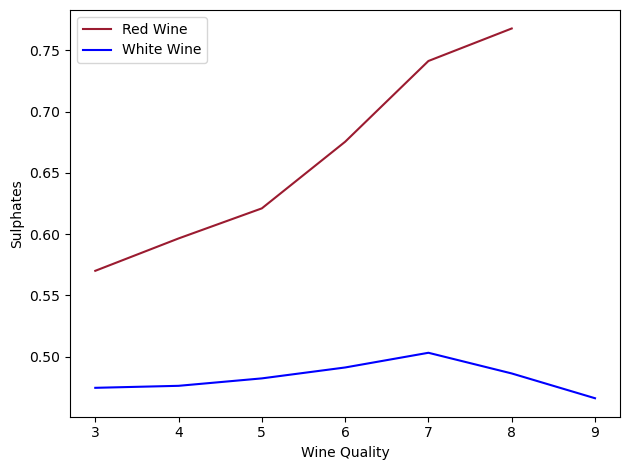

In [ ]:
fig, ax = plt.subplots(1,1)

mean_SO2_ratio_value_red = red_wine.groupby("quality")["sulphates"].mean()

mean_so2ratio_red = sns.lineplot(x = mean_SO2_ratio_value_red.index, y = mean_SO2_ratio_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Sulphates")

mean_SO2_ratio_value_white = white_wine.groupby("quality")["sulphates"].mean()

mean_so2ratio_white = sns.lineplot(x = mean_SO2_ratio_value_white.index, y = mean_SO2_ratio_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

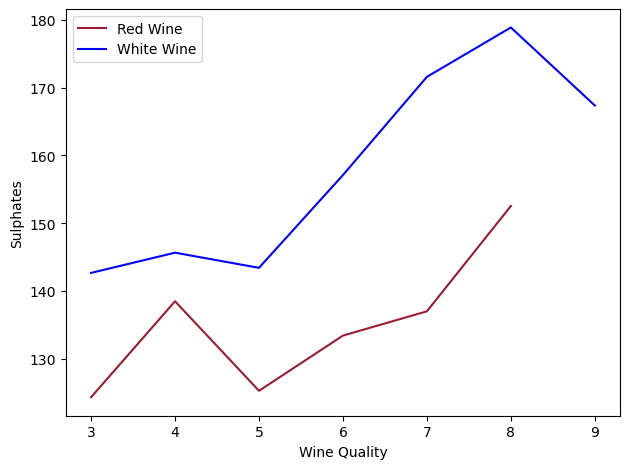

In [ ]:
fig, ax = plt.subplots(1,1)

alc_acid_ratio_value_red = red_wine.groupby("quality")["alc_acid_ratio"].mean()

alc_acid_ratio_value_redd = sns.lineplot(x = alc_acid_ratio_value_red.index, y = alc_acid_ratio_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Sulphates")

mean_SO2_ratio_value_white = white_wine.groupby("quality")["alc_acid_ratio"].mean()

mean_so2ratio_white = sns.lineplot(x = mean_SO2_ratio_value_white.index, y = mean_SO2_ratio_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

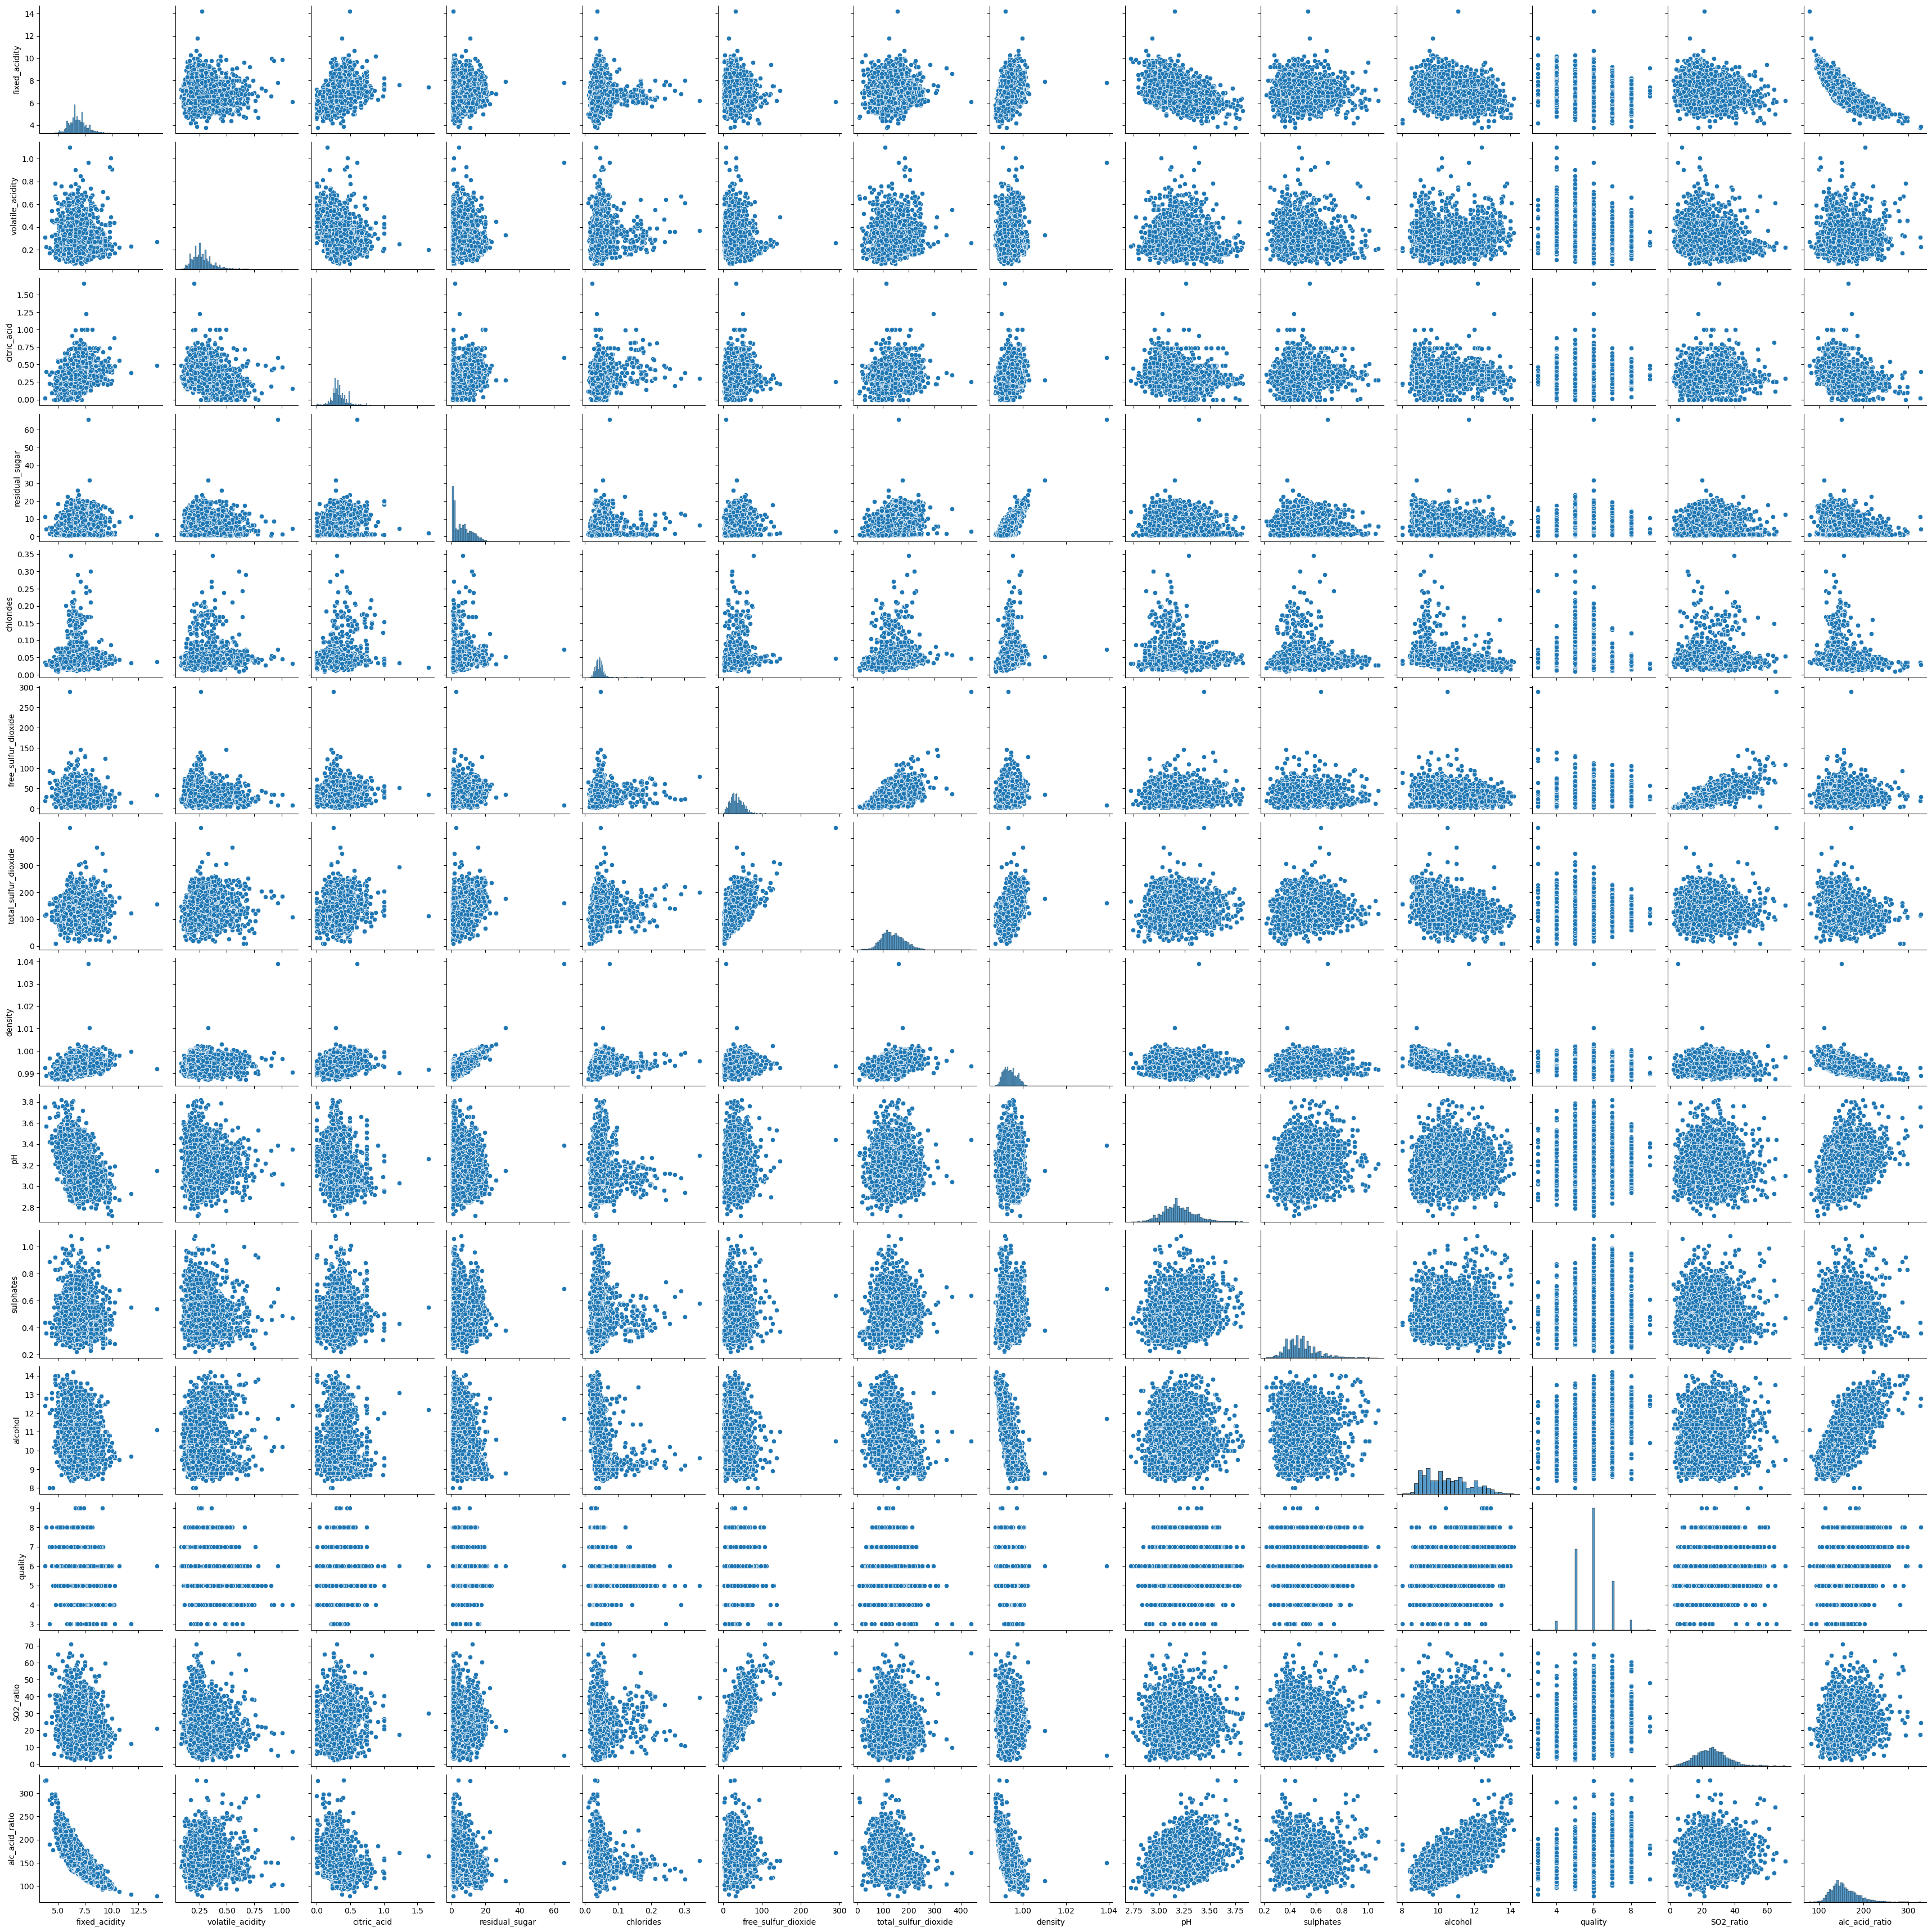

In [ ]:
sns.pairplot(white_wine)

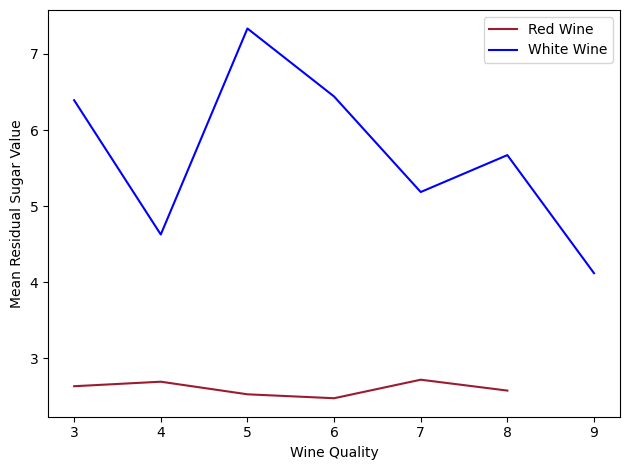

In [ ]:
## Residual sugar vs quality

fig, ax = plt.subplots(1,1)
mean_rs_value_red = red_wine.groupby("quality")["residual_sugar"].mean()

mean_rs_value_red = sns.lineplot(x = mean_rs_value_red.index, y = mean_rs_value_red.values, ax = ax, color="#9B1B30", label = "Red Wine")
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Mean Residual Sugar Value")

mean_rs_value_white = white_wine.groupby("quality")["residual_sugar"].mean()

mean_rs_white = sns.lineplot(x = mean_rs_value_white.index, y = mean_rs_value_white.values, ax = ax, color="blue", label = "White Wine")

plt.tight_layout()
plt.show()

D:\Users\Olunia\AppData\Local\Temp\ipykernel_41800\2362905411.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


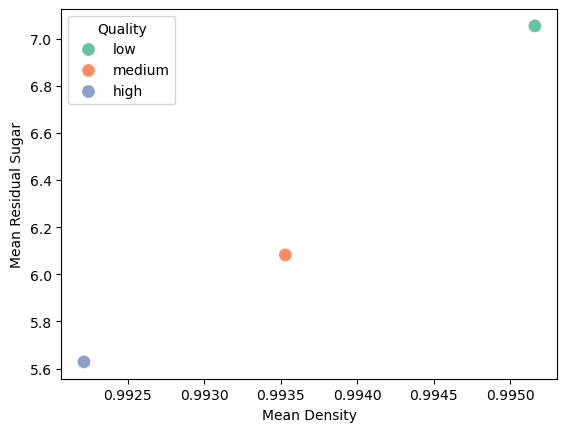

In [ ]:
### Residual sugar vs density / quality

# r = sns.stripplot(data = white_wine, x = "density", y = "residual_sugar")
# r.set(xlabel = "Density", ylabel = "Residual Sugar")
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Create a scatterplot where 'x' is 'density' and 'y' is 'residual_sugar'
r = sns.scatterplot(data=mean_values, x="density", y="residual_sugar", hue="quality_label", palette="Set2", s=100)

# Set labels for the plot
r.set(xlabel="Mean Density", ylabel="Mean Residual Sugar")

# Optional: Adjust the legend position
r.legend(title='Quality', loc='upper left')

plt.show()



D:\Users\Olunia\AppData\Local\Temp\ipykernel_41800\2164716595.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = red_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


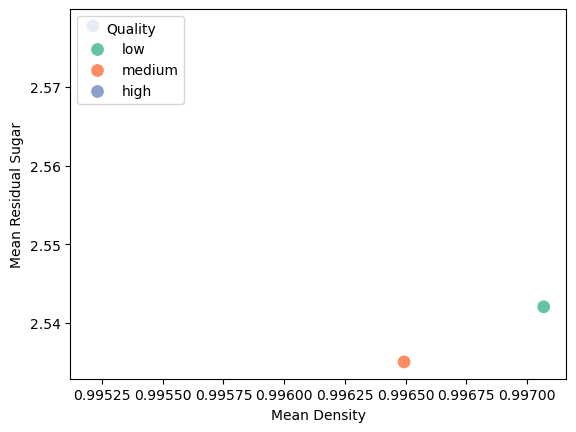

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = red_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Create a scatterplot where 'x' is 'density' and 'y' is 'residual_sugar'
r = sns.scatterplot(data=mean_values, x="density", y="residual_sugar", hue="quality_label", palette="Set2", s=100)

# Set labels for the plot
r.set(xlabel="Mean Density", ylabel="Mean Residual Sugar")

# Optional: Adjust the legend position
r.legend(title='Quality', loc='upper left')


D:\Users\Olunia\AppData\Local\Temp\ipykernel_41800\2951237438.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()


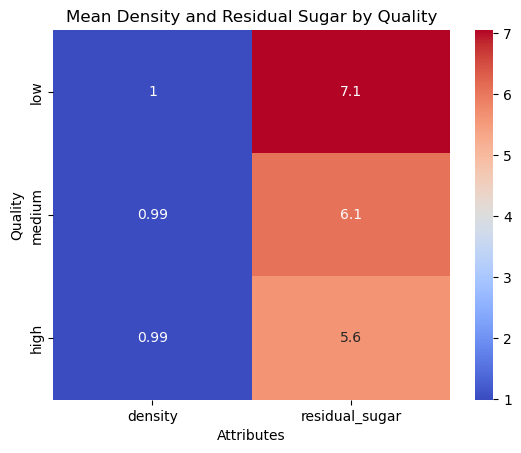

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'quality' and calculate the mean of 'density' and 'residual_sugar'
mean_values = white_wine.groupby('quality_label')[['density', 'residual_sugar']].mean().reset_index()

# Set 'quality' as the index
mean_values.set_index('quality_label', inplace=True)

# Create a heatmap
sns.heatmap(mean_values, annot=True, cmap="coolwarm", cbar=True)

# Set labels
plt.xlabel("Attributes")
plt.ylabel("Quality")
plt.title("Mean Density and Residual Sugar by Quality")

plt.show()


### Sprint 2

Text(0.65, 1.25, 'Red Wine Univariate Plots')

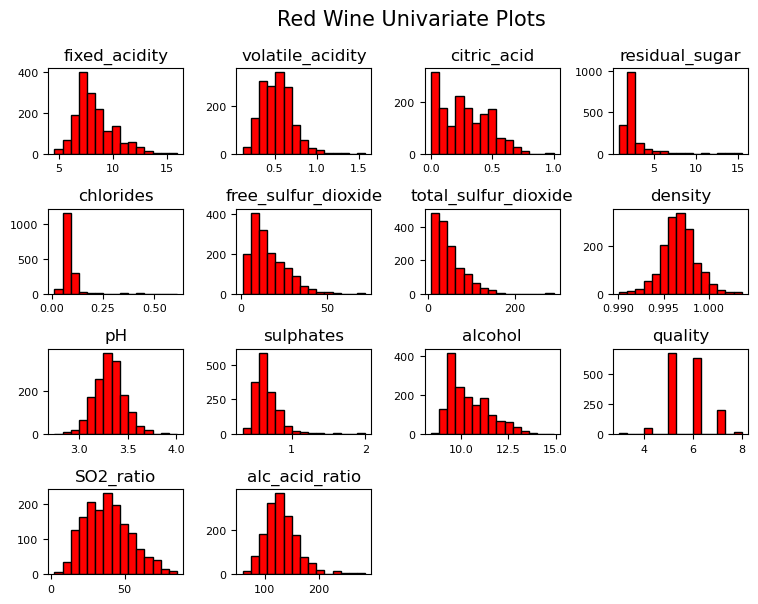

In [ ]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

Text(0.65, 1.25, 'White Wine Univariate Plots')

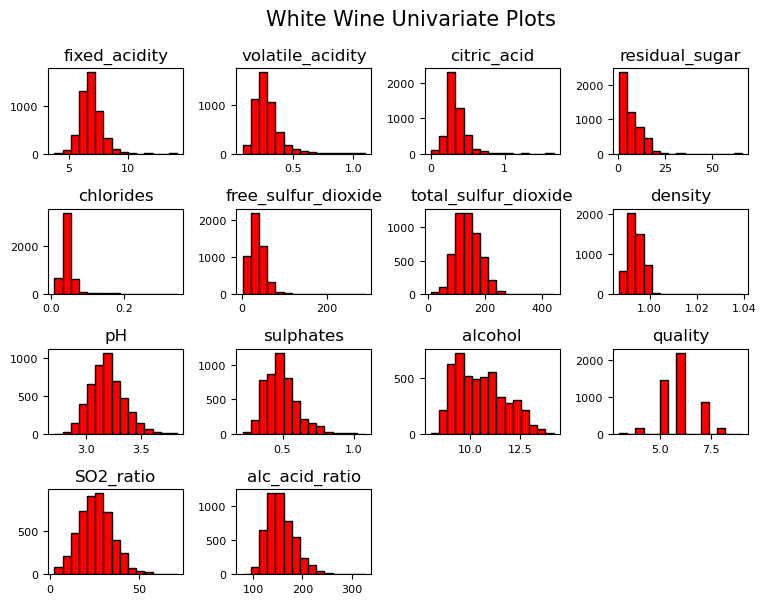

In [ ]:
white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

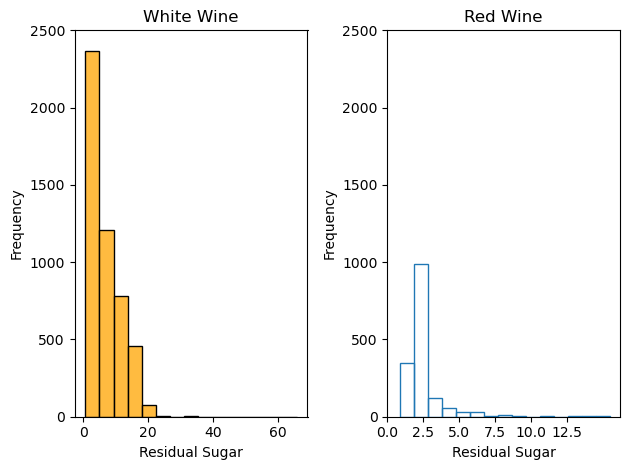

In [ ]:
fig, ax = plt.subplots(1,2)

rs_white = sns.histplot(data = white_wine, x = "residual_sugar", ax = ax[0], bins= 15, color = "orange")
rs_red = sns.histplot(data = red_wine, x = "residual_sugar", ax = ax[1], bins = 15, fill = False)
ax[0].set_ylim(0,2500)
ax[1].set_ylim(0,2500)

ax[1].set_xticks(np.arange(0, 15, step = 2.5))

ax[1].set_xlabel("Residual Sugar")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Red Wine")

ax[0].set_xlabel("Residual Sugar")
ax[0].set_ylabel("Frequency")
ax[0].set_title("White Wine")

plt.tight_layout()


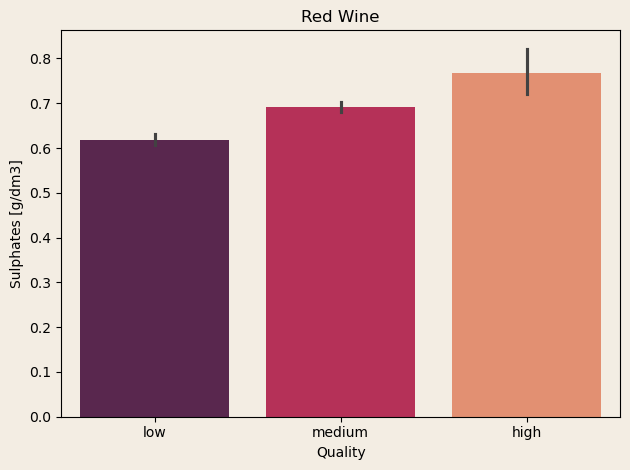

In [ ]:
fig = plt.figure()

x = sns.barplot(data = red_wine, x = "quality_label", y = "sulphates", hue="quality_label", palette="rocket")
fig.patch.set_facecolor('#f3ede3')
x.set_xlabel("Quality")
x.set_ylabel("Sulphates [g/dm3]")
ax = plt.gca()  

ax.set_facecolor("#f3ede3")
ax.set_title("Red Wine")
plt.tight_layout()
plt.show()

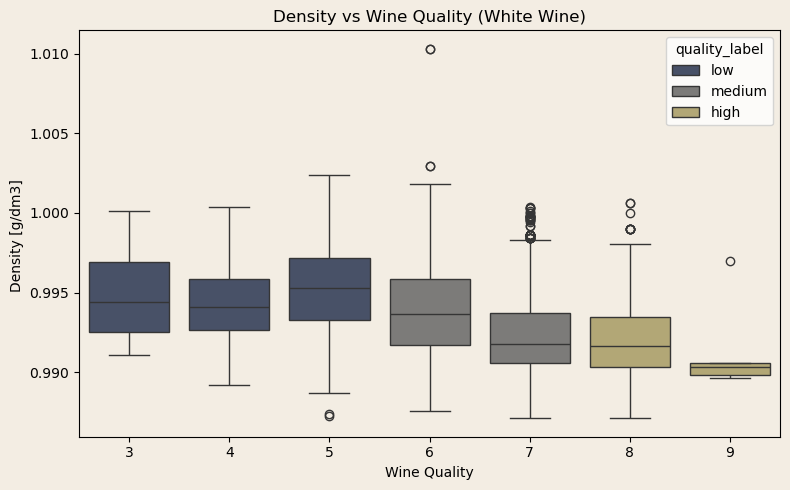

In [ ]:
# Create the violin plot for white wine with hue as quality label and using "cividis" palette

filtered_white_wine = white_wine[white_wine["density"] < 1.03]
fig = plt.figure(figsize=(8, 5))

sns.boxplot(data=filtered_white_wine, x="quality", y="density", hue="quality_label", palette="cividis")

    # Add labels and title
plt.xlabel("Wine Quality")
plt.ylabel("Density [g/dm3] ")
plt.title("Density vs Wine Quality (White Wine)")
fig.patch.set_facecolor('#f3ede3')
ax = plt.gca()  
ax.set_facecolor("#f3ede3")
    # Show plot
   
plt.tight_layout()
plt.show()

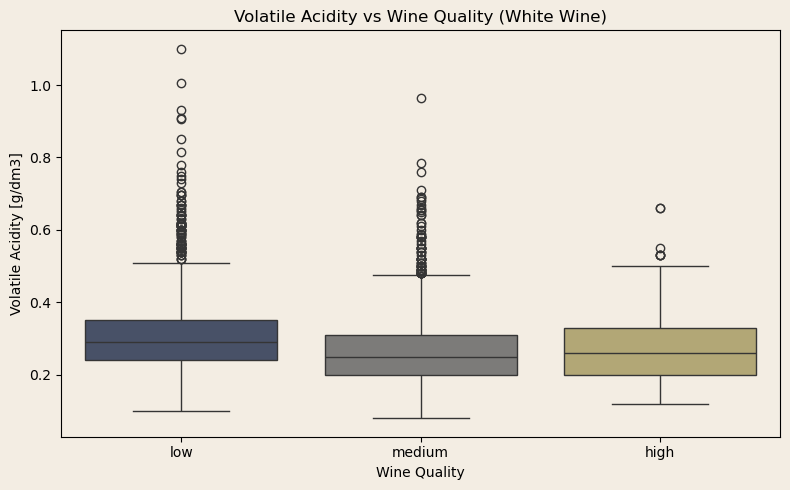

In [ ]:

fig = plt.figure(figsize=(8, 5))

sns.boxplot(data=white_wine, x="quality_label", y="volatile_acidity", hue="quality_label", palette="cividis")

plt.xlabel("Wine Quality")
plt.ylabel("Volatile Acidity [g/dm3]")
plt.title("Volatile Acidity vs Wine Quality (White Wine)")
fig.patch.set_facecolor('#f3ede3')
ax = plt.gca()  
ax.set_facecolor("#f3ede3")
   
plt.tight_layout()
plt.show()

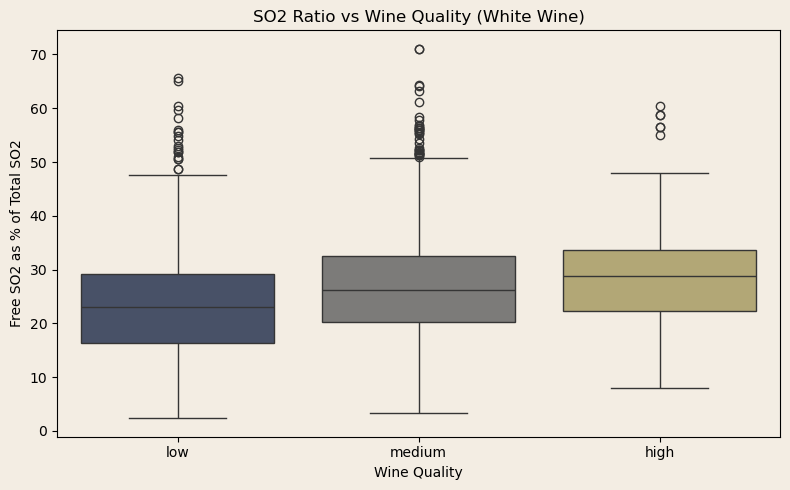

In [ ]:
fig = plt.figure(figsize=(8, 5))

sns.boxplot(data=white_wine, x="quality_label", y="SO2_ratio", hue="quality_label", palette="cividis")

plt.xlabel("Wine Quality")
plt.ylabel("Free SO2 as % of Total SO2")
plt.title("SO2 Ratio vs Wine Quality (White Wine)")
fig.patch.set_facecolor('#f3ede3')
ax = plt.gca()  
ax.set_facecolor("#f3ede3")
   
plt.tight_layout()
plt.show()

In [ ]:
red_wine['alcohol_g_per_L'] = red_wine['alcohol'] * 10 * 0.789

# Calculate the acidity-to-alcohol ratio
red_wine['acidity_to_alcohol_ratio'] = red_wine['fixed_acidity'] / red_wine['alcohol_g_per_L']



<Axes: >

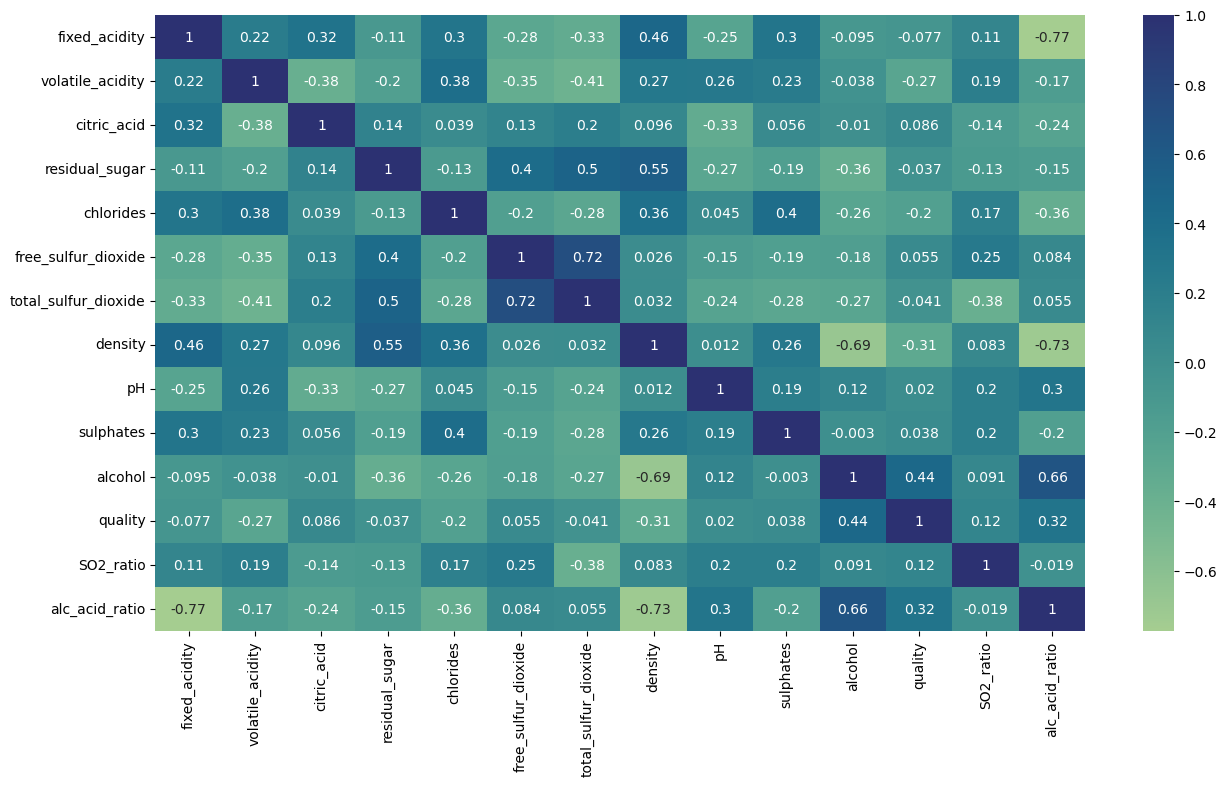

In [ ]:
fig = plt.figure(figsize=(15,8))
all_wines_numeric = all_wines.drop(columns = ["quality_label", "wine_type"])
corr_matrix = all_wines_numeric.corr()
sns.heatmap(data = corr_matrix, cmap = "crest", annot = True)

<Axes: >

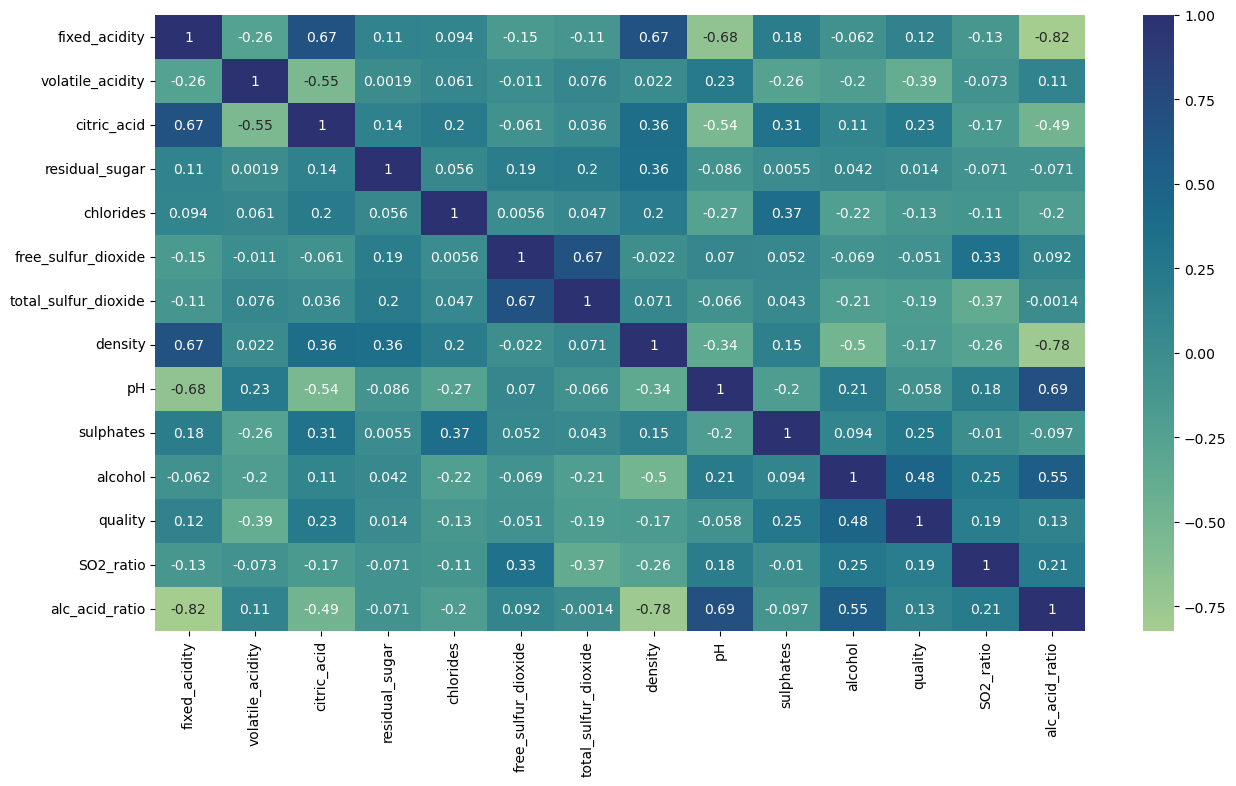

In [ ]:
fig = plt.figure(figsize=(15,8))
red_wine_numeric = red_wine.drop(columns = ["quality_label", "wine_type"])
corr_matrix = red_wine_numeric.corr()
sns.heatmap(data = corr_matrix, cmap = "crest", annot = True)

<Axes: >

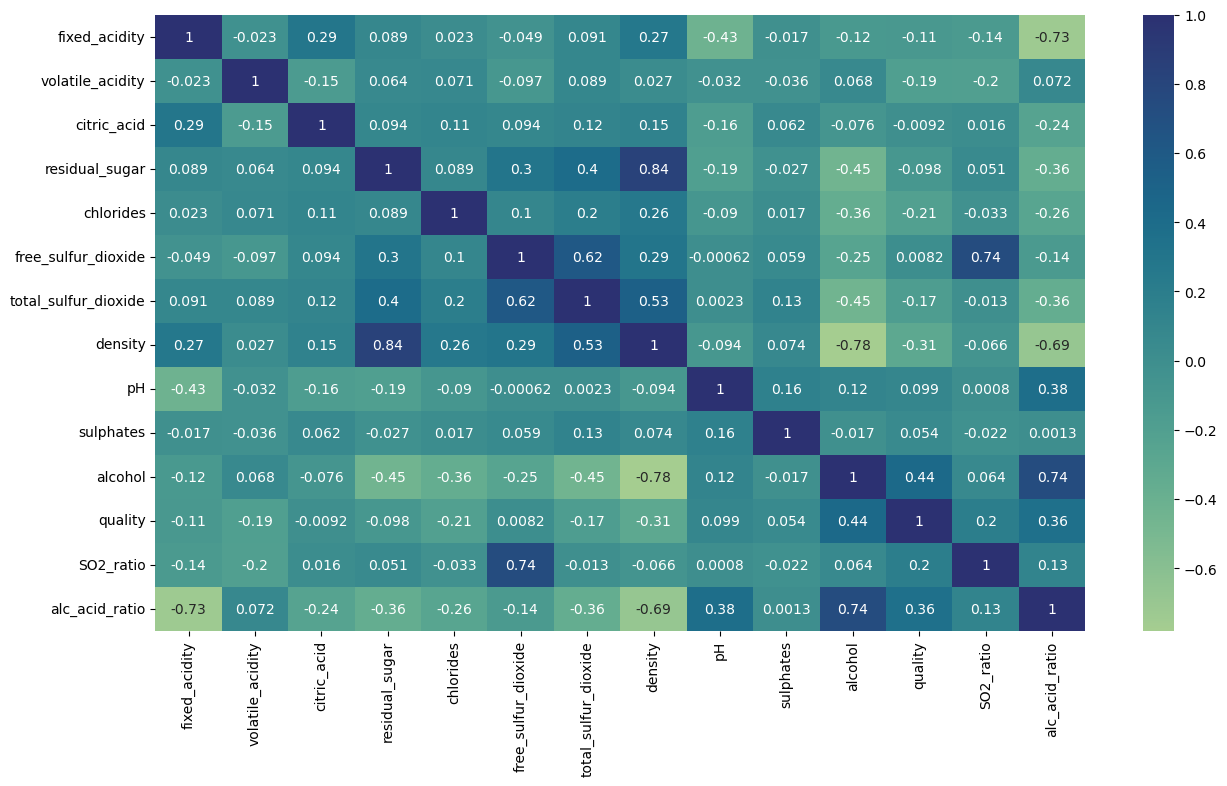

In [ ]:
fig = plt.figure(figsize=(15,8))
white_wine_numeric = white_wine.drop(columns = ["quality_label", "wine_type"])
corr_matrix = white_wine_numeric.corr()
sns.heatmap(data = corr_matrix, cmap = "crest", annot = True)

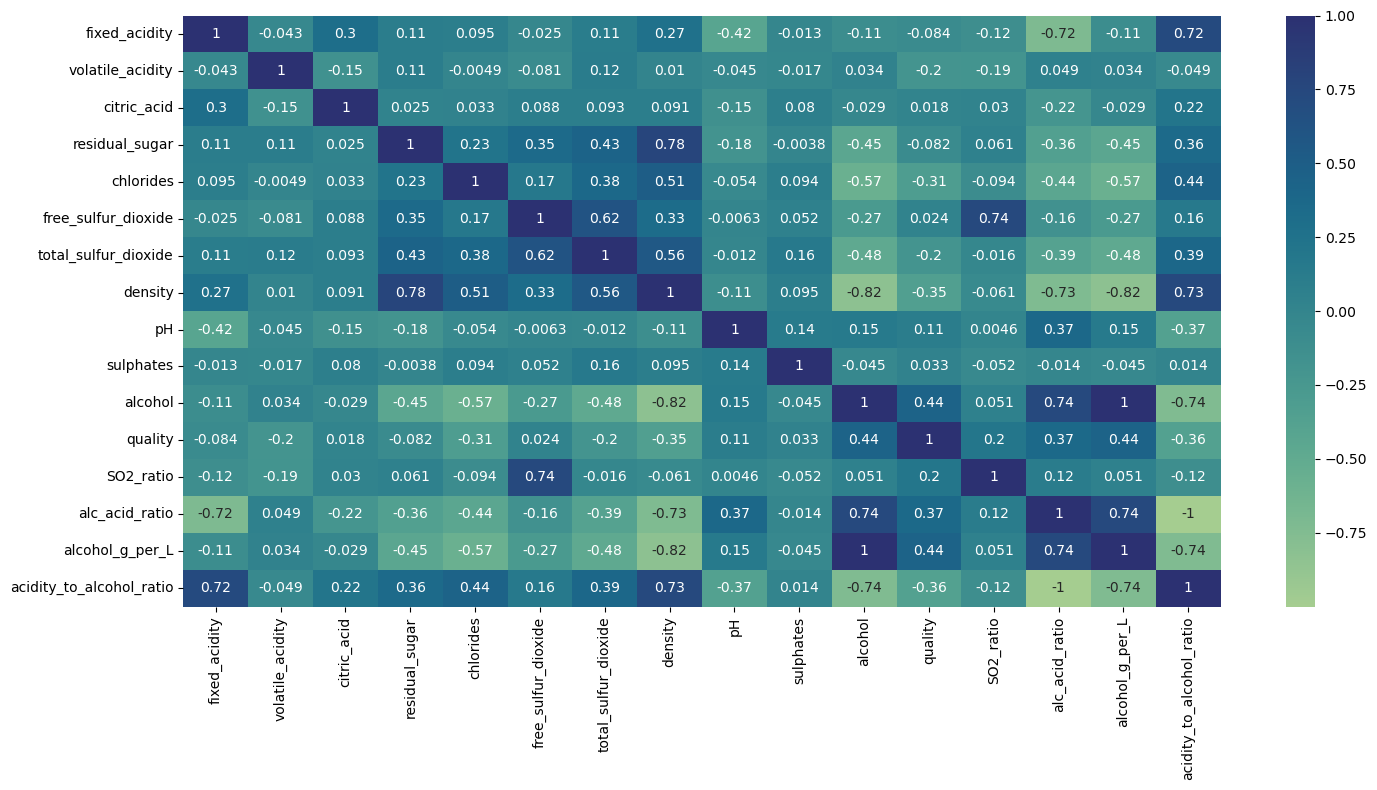

In [ ]:
# Usunięcie zmiennych kategorycznych (bo .corr() działa tylko na liczbach)
white_wine_numeric = white_wine.drop(columns=["quality_label", "wine_type"])

# Tworzenie wykresu
fig = plt.figure(figsize=(15, 8))

# # Macierz korelacji Pearsona
# corr_matrix_pearson = white_wine_numeric.corr(method="pearson")
# sns.heatmap(corr_matrix_pearson, cmap="crest", annot=True, ax=axes[0])
# axes[0].set_title("Pearson Correlation")

# Macierz korelacji Spearmana
corr_matrix_spearman = white_wine_numeric.corr(method="spearman")
sns.heatmap(corr_matrix_spearman, cmap="crest", annot=True)
# axes[1].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

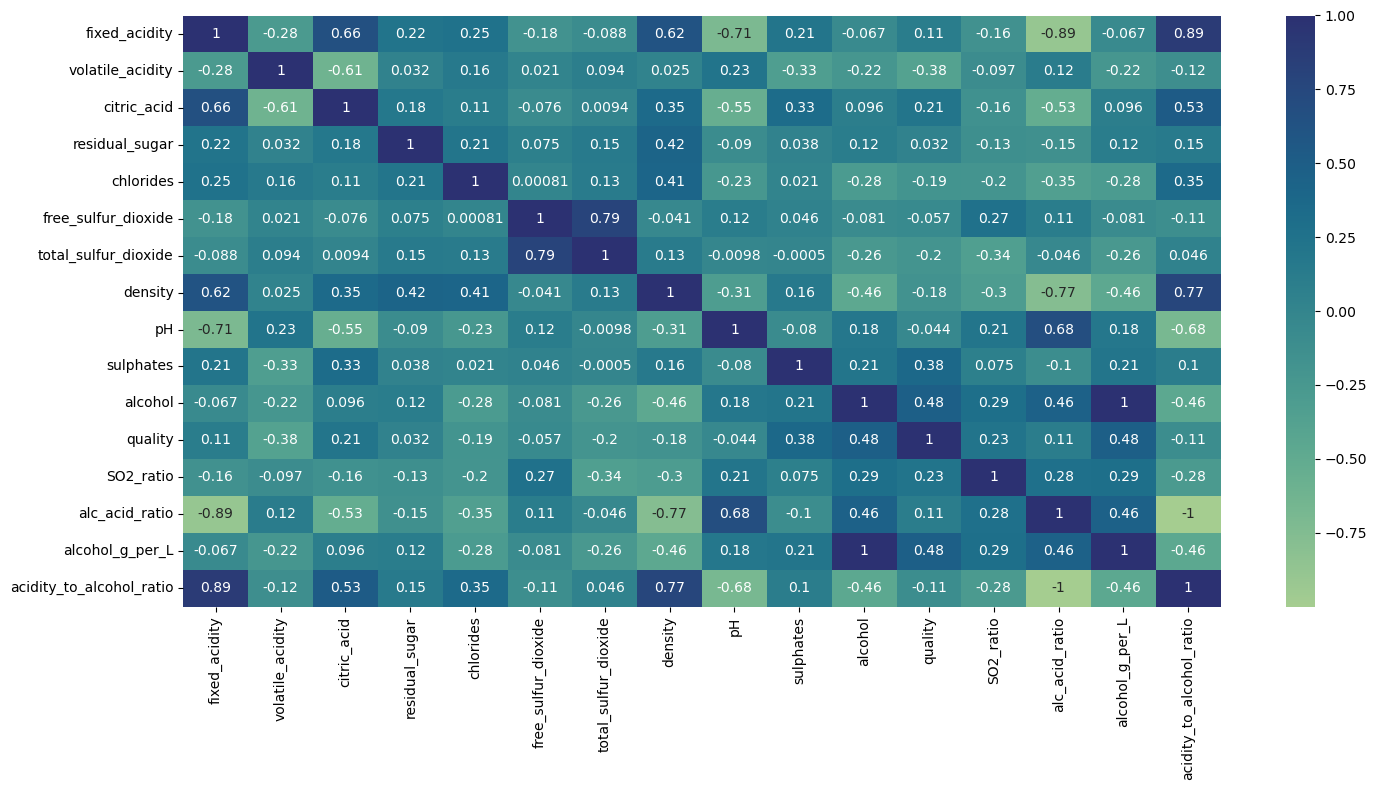

In [ ]:
# Usunięcie zmiennych kategorycznych (bo .corr() działa tylko na liczbach)
red_wine_numeric = red_wine.drop(columns=["quality_label", "wine_type"])

# Tworzenie wykresu
fig = plt.figure(figsize=(15, 8))

# # Macierz korelacji Pearsona
# corr_matrix_pearson = white_wine_numeric.corr(method="pearson")
# sns.heatmap(corr_matrix_pearson, cmap="crest", annot=True, ax=axes[0])
# axes[0].set_title("Pearson Correlation")

# Macierz korelacji Spearmana
corr_matrix_spearman = red_wine_numeric.corr(method="spearman")
sns.heatmap(corr_matrix_spearman, cmap="crest", annot=True)
# axes[1].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Iteracja po wszystkich kolumnach i obliczenie korelacji z "quality"
for column in white_wine.drop(columns=["quality_label", "wine_type"]):
    corr, p_value = spearmanr(white_wine["quality"], white_wine[column])
    print(f"{column}:   {corr:.3f} (p-value: {p_value:.5f})")

fixed_acidity:   -0.084 (p-value: 0.00000)
volatile_acidity:   -0.197 (p-value: 0.00000)
citric_acid:   0.018 (p-value: 0.19956)
residual_sugar:   -0.082 (p-value: 0.00000)
chlorides:   -0.314 (p-value: 0.00000)
free_sulfur_dioxide:   0.024 (p-value: 0.09703)
total_sulfur_dioxide:   -0.197 (p-value: 0.00000)
density:   -0.348 (p-value: 0.00000)
pH:   0.109 (p-value: 0.00000)
sulphates:   0.033 (p-value: 0.01971)
alcohol:   0.440 (p-value: 0.00000)
quality:   1.000 (p-value: 0.00000)
SO2_ratio:   0.196 (p-value: 0.00000)
alc_acid_ratio:   0.365 (p-value: 0.00000)


In [ ]:
from scipy.stats import spearmanr

# Iteracja po wszystkich kolumnach i obliczenie korelacji z "quality"
for column in red_wine.drop(columns=["quality_label", "wine_type"]):
    corr, p_value = spearmanr(red_wine["quality"], red_wine[column])
    print(f"{column}:   {corr:.3f} (p-value: {p_value:.5f})")

fixed_acidity:   0.114 (p-value: 0.00000)
volatile_acidity:   -0.381 (p-value: 0.00000)
citric_acid:   0.213 (p-value: 0.00000)
residual_sugar:   0.032 (p-value: 0.20025)
chlorides:   -0.190 (p-value: 0.00000)
free_sulfur_dioxide:   -0.057 (p-value: 0.02288)
total_sulfur_dioxide:   -0.197 (p-value: 0.00000)
density:   -0.177 (p-value: 0.00000)
pH:   -0.044 (p-value: 0.08085)
sulphates:   0.377 (p-value: 0.00000)
alcohol:   0.479 (p-value: 0.00000)
quality:   1.000 (p-value: 0.00000)
SO2_ratio:   0.226 (p-value: 0.00000)
alc_acid_ratio:   0.109 (p-value: 0.00001)


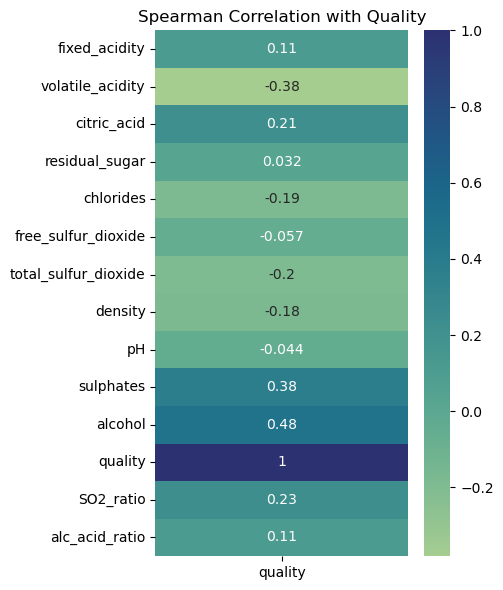

In [ ]:
# Extract the Spearman correlation matrix
corr_matrix_spearman = red_wine_numeric.corr(method="spearman")

# Focus only on the correlation of "quality" with other features
quality_corr = corr_matrix_spearman['quality']

# Create the heatmap for quality correlations
plt.figure(figsize=(5, 6))
sns.heatmap(quality_corr.to_frame(), annot=True, cmap="crest")
plt.title('Spearman Correlation with Quality')
plt.tight_layout()
plt.show()

### Corr zero shows no correlation, where 1 is a strong correlation

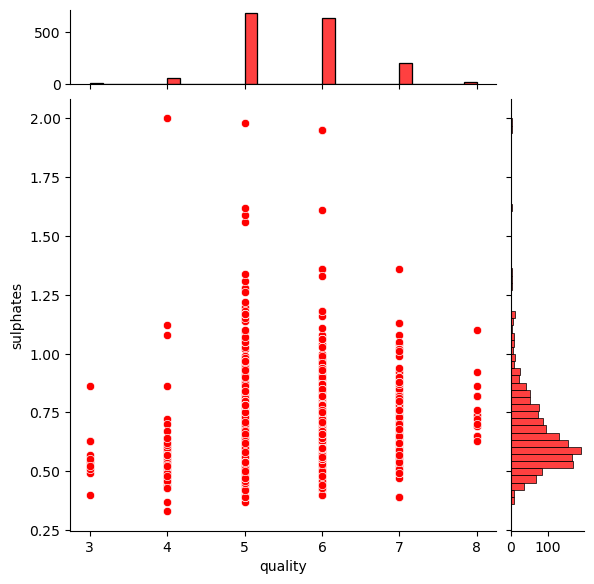

In [ ]:
sns.jointplot(data=red_wine, x='quality', y='sulphates', color= "red", marginal_ticks=True)

In [ ]:
sns.jointplot(data=red_wine, x='quality', y='SO2_ratio', color= "red", marginal_ticks=True)

Error in callback <function flush_figures at 0x000002A401973420> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

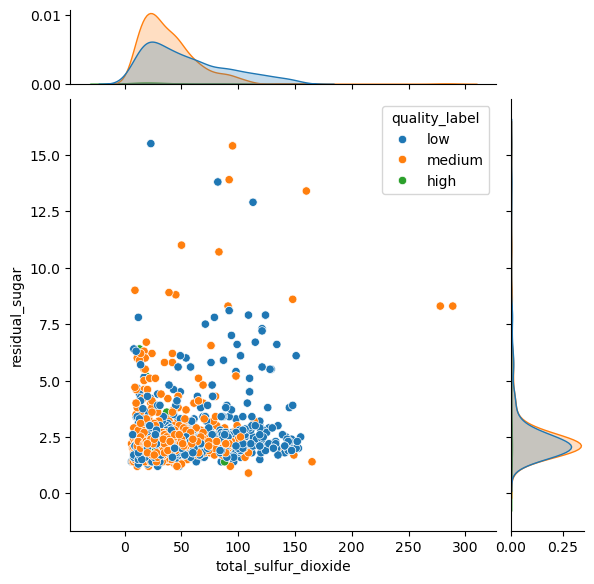

In [ ]:
sns.jointplot(data=red_wine, x='total_sulfur_dioxide', y='residual_sugar', color= "red", marginal_ticks=True, hue = "quality_label")

<Axes: xlabel='alcohol', ylabel='sulphates'>

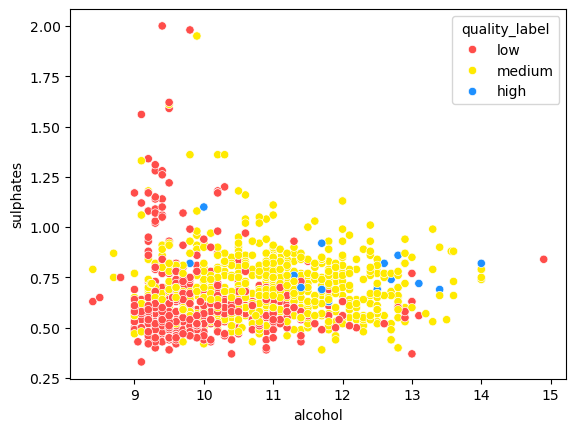

In [ ]:
# Define a custom color palette for each quality label
# red_wine["quality_label"] = pd.Categorical(red_wine["quality_label"])
custom_palette = ["#ff4d4a","#ffea00","#1e90ff"]
sns.set_palette(custom_palette)
sns.scatterplot(
    data=red_wine, x="alcohol", y="sulphates", hue = "quality_label"
)

### Statistical Analysis

In [ ]:
from scipy import stats
from scipy.stats import shapiro

F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['alcohol'],
    red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
    red_wine[red_wine['quality_label'] == 'high']['alcohol']
)
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 205.23448800361507 	p-value: 4.776936653588672e-80


In [ ]:
from scipy import stats
from scipy.stats import shapiro

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['alcohol'],
    white_wine[white_wine['quality_label'] == 'medium']['alcohol'],
    white_wine[white_wine['quality_label'] == 'high']['alcohol']
)
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 478.1628922043277 	p-value: 2.0647901873531918e-190


In [ ]:
from scipy import stats
from scipy.stats import shapiro

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['density'],
    white_wine[white_wine['quality_label'] == 'medium']['density'],
    white_wine[white_wine['quality_label'] == 'high']['density']
)
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 209.69457693191376 	p-value: 4.1941323440944663e-88


In [ ]:
ks_stat, p_value = stats.kstest(all_wines["pH"], 'norm')

print("Kolmogorov-Smirnov Test for Normality")
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

result = stats.anderson(red_wine['free_sulfur_dioxide'], dist='norm')
print("Anderson-Darling Test:", result.statistic)
print("Critical values:", result.critical_values)
print("Significance levels:", result.significance_level)

if result.statistic < result.critical_values[2]:  # 5% significance level
    print("Data appears to be normally distributed.")
else:
    print("Data does NOT follow a normal distribution.")

Kolmogorov-Smirnov Test for Normality
KS Statistic: 0.9967741235887991, p-value: 0.0
Anderson-Darling Test: 38.60990999200476
Critical values: [0.575 0.654 0.785 0.916 1.089]
Significance levels: [15.  10.   5.   2.5  1. ]
Data does NOT follow a normal distribution.


In [ ]:
# Red Wine / SO2 Ratio
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['SO2_ratio'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['SO2_ratio'],
    red_wine[red_wine['quality_label'] == 'medium']['SO2_ratio'],
    red_wine[red_wine['quality_label'] == 'high']['SO2_ratio']
)
print('ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

Shapiro-Wilk Test: Stat=0.9862099103331893, p-value=2.0535637197902008e-11
ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings
F Statistic: 45.194253385286714 	p-value: 8.091930535200915e-20


In [ ]:
F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['free_sulfur_dioxide'],
    red_wine[red_wine['quality_label'] == 'medium']['free_sulfur_dioxide'],
    red_wine[red_wine['quality_label'] == 'high']['free_sulfur_dioxide']
)
print('ANOVA test for mean free_sulfur_dioxide levels across red wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean free_sulfur_dioxide levels across red wine samples with different quality ratings
F Statistic: 3.3917571885448745 	p-value: 0.03389222922181107


In [ ]:
# White Wine / SO2 Ratio

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['SO2_ratio'],
    white_wine[white_wine['quality_label'] == 'medium']['SO2_ratio'],
    white_wine[white_wine['quality_label'] == 'high']['SO2_ratio']
)
print('ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

# numerator = 3-1 = 2
# denumerator = 4898 -3 = 4895

critical_value = stats.f.ppf(1 - p, 2, 4895)
print(f"Critical Value {critical_value}")

ANOVA test for mean SO2_ratio levels across wine samples with different quality ratings
F Statistic: 83.78733913009978 	p-value: 1.6619506290953235e-36
Critical Value inf


In [ ]:
len(white_wine)

4898

In [ ]:
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['fixed_acidity'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['fixed_acidity'],
    white_wine[white_wine['quality_label'] == 'medium']['fixed_acidity'],
    white_wine[white_wine['quality_label'] == 'high']['fixed_acidity']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

Shapiro-Wilk Test: Stat=0.967993091842366, p-value=1.3161925990842658e-18
ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 21.923026494425756 	p-value: 3.321537387880916e-10


In [ ]:
# ANOVA Test  - most suitable for data that is normally distributed
stat, p_value = shapiro(white_wine[white_wine['quality_label'] == 'low']['pH'])
print(f'Shapiro-Wilk Test: Stat={stat}, p-value={p_value}')

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['pH'],
    white_wine[white_wine['quality_label'] == 'medium']['pH'],
    white_wine[white_wine['quality_label'] == 'high']['pH']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

#if data is not normally distributed: 

from scipy.stats import kruskal

# Kruskal-Wallis test for pH across the quality groups
stat, p_value = kruskal(
    white_wine[white_wine['quality_label'] == 'low']['pH'],
    white_wine[white_wine['quality_label'] == 'medium']['pH'],
    white_wine[white_wine['quality_label'] == 'high']['pH']
)
print(f'Kruskal-Wallis Test: Stat={stat}, p-value={p_value}')

Shapiro-Wilk Test: Stat=0.9745520399853915, p-value=1.8618895687188931e-16
ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 19.690945958199926 	p-value: 3.0377212959215113e-09
Kruskal-Wallis Test: Stat=45.91385226298163, p-value=1.0713556385138677e-10


In [ ]:
F, p = stats.f_oneway(
    all_wines[all_wines['quality_label'] == 'low']['chlorides'],
    all_wines[all_wines['quality_label'] == 'medium']['chlorides'],
    all_wines[all_wines['quality_label'] == 'high']['chlorides']
)
print('ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean fixed_acidity levels across wine samples with different quality ratings
F Statistic: 120.96013685200977 	p-value: 2.645627533466762e-52


In [ ]:
F, p = stats.f_oneway(
    all_wines[all_wines['quality_label'] == 'low']['sulphates'],
    all_wines[all_wines['quality_label'] == 'medium']['sulphates'],
    all_wines[all_wines['quality_label'] == 'high']['sulphates']
)
print('ANOVA test for mean sulphates levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across wine samples with different quality ratings
F Statistic: 6.884948526194737 	p-value: 0.0010305533421903841


In [ ]:
F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['sulphates'],
    white_wine[white_wine['quality_label'] == 'medium']['sulphates'],
    white_wine[white_wine['quality_label'] == 'high']['sulphates']
)
print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 7.115761884652371 	p-value: 0.0008206303019817734


In [ ]:
F, p = stats.f_oneway(    
    red_wine[red_wine['quality_label'] == 'low']['sulphates'],
    red_wine[red_wine['quality_label'] == 'medium']['sulphates'],
    red_wine[red_wine['quality_label'] == 'high']['sulphates']
)

print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 41.83852380407374 	p-value: 1.950137504448193e-18


In [ ]:
F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['citric_acid'],
    white_wine[white_wine['quality_label'] == 'medium']['citric_acid'],
    white_wine[white_wine['quality_label'] == 'high']['citric_acid']
)
print('ANOVA test for mean citric acid levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean citric acid levels across white wine samples with different quality ratings
F Statistic: 0.23254245986965996 	p-value: 0.7925248530727159


In [ ]:
F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['chlorides'],
    white_wine[white_wine['quality_label'] == 'medium']['chlorides'],
    white_wine[white_wine['quality_label'] == 'high']['chlorides']
)
print('ANOVA test for mean citric acid levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean citric acid levels across white wine samples with different quality ratings
F Statistic: 90.87064418602546 	p-value: 1.7797433543986758e-39


In [ ]:
F, p = stats.f_oneway(    
    red_wine[red_wine['quality_label'] == 'low']['citric_acid'],
    red_wine[red_wine['quality_label'] == 'medium']['citric_acid'],
    red_wine[red_wine['quality_label'] == 'high']['citric_acid']
)

print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 22.85735545283018 	p-value: 1.6318768805914607e-10


In [ ]:
F, p = stats.f_oneway(
    all_wines[all_wines['quality_label'] == 'low']['free_sulfur_dioxide'],
    all_wines[all_wines['quality_label'] == 'medium']['free_sulfur_dioxide'],
    all_wines[all_wines['quality_label'] == 'high']['free_sulfur_dioxide']
)
print('ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings
F Statistic: 10.312540552928873 	p-value: 3.3761187237755544e-05


In [ ]:
F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['volatile_acidity'],
    red_wine[red_wine['quality_label'] == 'medium']['volatile_acidity'],
    red_wine[red_wine['quality_label'] == 'high']['volatile_acidity']
)
print('ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings
F Statistic: 92.87437900766831 	p-value: 6.994633687008598e-39


In [ ]:
F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['volatile_acidity'],
    white_wine[white_wine['quality_label'] == 'medium']['volatile_acidity'],
    white_wine[white_wine['quality_label'] == 'high']['volatile_acidity']
)
print('ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean free_sulfur_dioxide levels across wine samples with different quality ratings
F Statistic: 133.6668084396585 	p-value: 3.012823078922054e-57


In [ ]:
red_wine['density_to_sugar_ratio'] = red_wine['density'] / red_wine['residual_sugar']

F, p = stats.f_oneway(
    red_wine[red_wine['quality_label'] == 'low']['density_to_sugar_ratio'],
    red_wine[red_wine['quality_label'] == 'medium']['density_to_sugar_ratio'],
    red_wine[red_wine['quality_label'] == 'high']['density_to_sugar_ratio']
)
print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 0.004529019807553639 	p-value: 0.9954812335309283


In [ ]:
white_wine['density_to_sugar_ratio'] = white_wine['density'] / white_wine['residual_sugar']

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['density_to_sugar_ratio'],
    white_wine[white_wine['quality_label'] == 'medium']['density_to_sugar_ratio'],
    white_wine[white_wine['quality_label'] == 'high']['density_to_sugar_ratio']
)

print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 1.318300412857571 	p-value: 0.26768469527108696


In [ ]:
white_wine['sugar_to_sulfur'] = white_wine['residual_sugar'] / white_wine['total_sulfur_dioxide']

F, p = stats.f_oneway(
    white_wine[white_wine['quality_label'] == 'low']['sugar_to_sulfur'],
    white_wine[white_wine['quality_label'] == 'medium']['sugar_to_sulfur'],
    white_wine[white_wine['quality_label'] == 'high']['sugar_to_sulfur']
)

print('ANOVA test for mean sulphates levels across white wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean sulphates levels across white wine samples with different quality ratings
F Statistic: 1.922598357312112 	p-value: 0.14633692392213674
